In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
1201 + 326 + 685 + 328 + 1195 + 2225

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
from model_equations_separate_NC_sep_vmax import *

In [5]:
import run_sensitivity

ModuleNotFoundError: No module named 'SALib'

In [ ]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
gorder = [ 'Sustained', 'Strong', 'Inhibited',]
gpalette = sns.color_palette('Accent', n_colors=3).as_hex()
gpalette

['#7fc97f', '#beaed4', '#fdc086']

In [7]:
morder = ['MIN', 'LEAK', 'MIXO']

In [8]:
morder = ['MIN', 'LEAK', 'MIXO']
mpalette = sns.color_palette(palette='gist_stern', n_colors=3)
mpalette

In [9]:
rmse_threshold = 20

In [10]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [11]:
#dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
#dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

In [12]:
import os
os.listdir(dpath)

['het_monte_mse.csv.gz',
 'vhet_mse.csv.gz',
 'lsq_strong_mse.csv.gz',
 'PONLY',
 'lsq_strong_sustained_df.csv.gz',
 'lsq_strong_sum.csv.gz',
 'lsq_strong_df.csv.gz',
 'lsq_strong_sustained_mse.csv.gz',
 'toremove',
 'lsq_strong_sustained_sum.csv.gz',
 'vhet_sum.csv.gz',
 'het_monte_df.csv.gz',
 'vhet_df.csv.gz',
 'het_monte_sum.csv.gz']

In [13]:
lsq_df =  pd.read_csv(os.path.join(dpath,'lsq_strong_sustained_df.csv.gz' ))
lsqsum_df = pd.read_csv(os.path.join(dpath,'lsq_strong_sustained_sum.csv.gz' ))
lsqmse_df = pd.read_csv(os.path.join(dpath,'lsq_strong_sustained_mse.csv.gz' ))

In [14]:
monte1_df =  pd.read_csv(os.path.join(dpath,'het_monte_df.csv.gz' ))
monte1sum_df = pd.read_csv(os.path.join(dpath,'het_monte_sum.csv.gz' ))
monte1mse_df = pd.read_csv(os.path.join(dpath,'het_monte_mse.csv.gz' ))

In [15]:
vhet1_df =  pd.read_csv(os.path.join(dpath,'vhet_df.csv.gz' ))
vhet1sum_df = pd.read_csv(os.path.join(dpath,'vhet_sum.csv.gz' ))
vhet1mse_df = pd.read_csv(os.path.join(dpath,'vhet_mse.csv.gz' ))

In [16]:
monte1mse_df.run_id.unique()

array(['het_monte_LEAK_least_square_LEAK_0.01_841_h41740546101949368',
       'het_monte_LEAK_least_square_LEAK_0.01_376_h-3744324552018451942',
       'het_monte_LEAK_least_square_LEAK_0.01_556_h-8244342590826792512',
       ...,
       'het_monte_MIXO_least_square_MIXO_20_963_h2704790288506760930',
       'het_monte_MIXO_least_square_MIXO_20_892_h7696489876806693668',
       'het_monte_MIXO_least_square_MIXO_20_735_h-9035754185738008266'],
      dtype=object)

In [17]:
lsqsum_df.run_id.unique()

array(['het_least_square_MIN_least_square_MIN_0.01_5_1_h-4778139368656589578',
       'het_least_square_MIN_least_square_MIN_0.01_5_1_h7574824186036369943',
       'het_least_square_MIN_least_square_MIN_0.01_5_1_h-4907018662048764401',
       ...,
       'het_least_square_LEAK_least_square_LEAK_1_2_1_h4448921564895853518',
       'het_least_square_LEAK_least_square_LEAK_1_2_1_h-2621541311730279561',
       'het_least_square_LEAK_least_square_LEAK_1_2_1_h-46734221568027702'],
      dtype=object)

In [18]:
vhet1mse_df['optimized_for'] = vhet1mse_df.run_id.str.extract(r'_(\d+)_1$')
lsqmse_df['optimized_for'] = lsqmse_df.run_id.str.extract(r'_(\d+)_1_h$')



In [19]:
optimized_for_map = {
    '2': 'Sustained',
    '3': 'Inhibited','4': 'Inhibited',
    '5': 'Sustained','6': 'Strong','7': 'Strong',
    '8': 'Inhibited', '9': 'Inhibited','10': 'Inhibited','11': 'Inhibited'
}

In [20]:
vhet1mse_df['optimized_for_group'] = vhet1mse_df.optimized_for.map(optimized_for_map)
lsqmse_df['optimized_for'] = lsqmse_df.optimized_for.map(optimized_for_map)



In [21]:
monte1_df['Model'] = monte1_df.run_id.str.extract(r'het_monte_([A-Z]+)_')
monte1sum_df['Model']  = monte1sum_df.run_id.str.extract(r'het_monte_([A-Z]+)_')
monte1mse_df['Model'] = monte1mse_df.run_id.str.extract(r'het_monte_([A-Z]+)_')

vhet1_df['Model'] =  vhet1_df.run_id.str.extract(r'vhet_het_least_square_([A-Z]+)_least')
vhet1mse_df['Model'] = vhet1mse_df.run_id.str.extract(r'vhet_het_least_square_([A-Z]+)_least')
vhet1sum_df['Model'] = vhet1sum_df.run_id.str.extract(r'vhet_het_least_square_([A-Z]+)_least')

lsq_df['Model'] =  lsq_df.run_id.str.extract(r'het_least_square_([A-Z]+)_least')
lsqmse_df['Model'] = lsqmse_df.run_id.str.extract(r'het_least_square_([A-Z]+)_least')
lsqsum_df['Model'] = lsqsum_df.run_id.str.extract(r'het_least_square_([A-Z]+)_least')

In [22]:
monte1_df['VPRO'] = monte1_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
monte1sum_df['VPRO']  = monte1sum_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
monte1mse_df['VPRO'] = monte1mse_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')

vhet1_df['VPRO'] =  vhet1_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
vhet1mse_df['VPRO'] = vhet1mse_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
vhet1sum_df['VPRO'] = vhet1sum_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')

lsq_df['VPRO'] =  lsq_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
lsqmse_df['VPRO'] = lsqmse_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
lsqsum_df['VPRO'] = lsqsum_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')

In [23]:
monte1_df['Mode'] =  'Monte'
monte1mse_df['Mode'] =  'Monte'
vhet1_df['Mode'] =  'VHET'
vhet1mse_df['Mode'] =  'VHET'
lsq_df['Mode'] =  'LSQ'
lsqmse_df['Mode'] =  'LSQ'

In [24]:
monte1sum_df.shape, vhet1sum_df.shape, lsqsum_df.shape

In [25]:
df = pd.concat([monte1_df, vhet1_df, lsq_df
               ], ignore_index=True)
mse_df = pd.concat([monte1mse_df, vhet1mse_df, lsqmse_df
                   ], ignore_index=True)


In [26]:
mse_df['model/mode'] = mse_df['Model']+ ' / '+mse_df['Mode']
df['model/mode']     = df['Model']+ ' / '+df['Mode']


In [27]:
mdf = df.melt(id_vars=['Mode','Model', 'VPRO', 'model/mode', 'run_id', 'day', 't'], value_vars=['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',])

In [28]:
neg_ids = set(mdf.loc[mdf.value<-1e-6, 'run_id'])
#neg_ids
#df = df.loc[~df.run_id.isin(neg_ids)]
#sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


In [29]:
problematic_mse_ids = set(mse_df.loc[mse_df.compare_points < 74, 'run_id'])

In [30]:
problematic_ids = problematic_mse_ids | neg_ids

In [31]:
len(problematic_ids)

In [32]:
problematic_ids

{'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-1634490735601628386',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-3115546639491048941',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-3666882410859878342',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-4887656627708370830',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h1518772512242548527',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h3472576574107715014',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h5265406323482317194',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h7675690716741697744',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-1142201482516018065',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-2259166767266721742',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-2620894792244359402',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-2862815746917094123',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-3378310696365426824',
 'het_least_square_LEAK_least_squa

In [33]:
mdf = mdf.loc[~mdf.run_id.isin(problematic_ids)]
df = df.loc[~df.run_id.isin(problematic_ids)]
mse_df = mse_df.loc[~mse_df.run_id.isin(problematic_ids)]


In [34]:
mse_df.compare_points.value_counts()

74.0    1986780
Name: compare_points, dtype: int64

In [35]:
mse_df = mse_df.loc[~mse_df.Group.isin(['Axenic'])]

In [36]:
mse_df.Group.unique()
mse_df.loc[mse_df.Group.isin(['Inhibited Viable']), 'Group'] ='Inhibited'

In [37]:
mse_df['RMSE'] = np.sqrt(mse_df['MSE'])

In [38]:
#rmse_threshold = 10
mse_df['Group_thrs'] = mse_df['Group']
mse_df.loc[mse_df.RMSE > rmse_threshold, 'Group_thrs'] = 'None'


In [39]:
min_mse_df = mse_df.loc[mse_df.groupby('run_id').MSE.idxmin()].reset_index(drop=True)

In [40]:
min_mse_df

Sample                       full name      Group  compare_points  \
0        4C0       Phaeobacter gallaeciensis  Inhibited            74.0   
1       10B0                   Marinovum 5F3  Inhibited            74.0   
2        4C0       Phaeobacter gallaeciensis  Inhibited            74.0   
3        4C0       Phaeobacter gallaeciensis  Inhibited            74.0   
4       10B0                   Marinovum 5F3  Inhibited            74.0   
...      ...                             ...        ...             ...   
66221    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   
66222   10C0                   Marinovum 5F3  Inhibited            74.0   
66223   10C0                   Marinovum 5F3  Inhibited            74.0   
66224   10C0                   Marinovum 5F3  Inhibited            74.0   
66225   10C0                   Marinovum 5F3  Inhibited            74.0   

             MSE                                             run_id Model  \
0       3.068031  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
1       4.023713  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
2       3.068031  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
3       2.928330  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
4       4.023713  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
...          ...                                                ...   ...   
66221  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   
66222  43.638271  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   
66223  24.745346  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   
66224  26.003565  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   
66225  24.992259  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   

            VPRO  Mode optimized_for optimized_for_group   model/mode  \
0      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
1      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
2      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
3      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
4      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
...          ...   ...           ...                 ...          ...   
66221     MIXO_1  VHET             7              Strong  MIXO / VHET   
66222    MIXO_20  VHET             2           Sustained  MIXO / VHET   
66223    MIXO_20  VHET             5           Sustained  MIXO / VHET   
66224    MIXO_20  VHET             6              Strong  MIXO / VHET   
66225    MIXO_20  VHET             7              Strong  MIXO / VHET   

           RMSE Group_thrs  
0      1.751579  Inhibited  
1      2.005920  Inhibited  
2      1.751579  Inhibited  
3      1.711237  Inhibited  
4      2.005920  Inhibited  
...         ...        ...  
66221  3.987844     Strong  
66222  6.605927  Inhibited  
66223  4.974469  Inhibited  
66224  5.099369  Inhibited  
66225  4.999226  Inhibited  

[66226 rows x 14 columns]

In [41]:
min_mse_df.Group.value_counts()

Inhibited    31885
Sustained    22922
Strong       11419
Name: Group, dtype: int64

In [42]:
min_mse_df.Group_thrs.value_counts()

Inhibited    31882
Sustained    22394
Strong       11418
None           532
Name: Group_thrs, dtype: int64

In [43]:
min_mse_df['Mode'].value_counts()

LSQ      49963
Monte    16184
VHET        79
Name: Mode, dtype: int64

In [44]:
min_mse_df['model/mode'].value_counts()

MIN / LSQ       36024
MIXO / LSQ       8552
MIN / Monte      6007
LEAK / LSQ       5387
MIXO / Monte     5119
LEAK / Monte     5058
MIN / VHET         41
LEAK / VHET        20
MIXO / VHET        18
Name: model/mode, dtype: int64

In [45]:
min_mse_df[[ 'Model', 'VPRO', 'Group', ]].value_counts().reset_index().sort_values(['Model'])

Model       VPRO      Group      0
19  LEAK    LEAK_10     Strong   1197
21  LEAK   LEAK_0.1  Inhibited   1087
22  LEAK     LEAK_1     Strong   1075
23  LEAK   LEAK_100  Sustained   1058
25  LEAK     LEAK_1  Inhibited    967
26  LEAK   LEAK_0.1     Strong    819
20  LEAK    LEAK_10  Inhibited   1096
28  LEAK  LEAK_0.01     Strong    649
31  LEAK   LEAK_100  Inhibited    308
32  LEAK   LEAK_100     Strong    145
33  LEAK     LEAK_1  Sustained    135
34  LEAK    LEAK_10  Sustained    104
35  LEAK   LEAK_0.1  Sustained     71
30  LEAK  LEAK_0.01  Sustained    457
18  LEAK  LEAK_0.01  Inhibited   1297
24   MIN   MIN_0.01  Inhibited   1011
36   MIN   MIN_0.01     Strong      6
0    MIN   MIN_0.01  Sustained  11328
16   MIN      MIN_1  Sustained   1349
1    MIN    MIN_0.1  Sustained   5464
2    MIN     MIN_20  Inhibited   4802
3    MIN    MIN_100  Inhibited   4700
4    MIN    MIN_100     Strong   3146
7    MIN     MIN_10  Inhibited   2406
17   MIN    MIN_100  Sustained   1334
9    MIN      MIN_1  Inhibited   1766
38   MIN    MIN_0.1     Strong      3
11   MIN    MIN_0.1  Inhibited   1660
12   MIN     MIN_20  Sustained   1622
15   MIN     MIN_20     Strong   1475
27  MIXO    MIXO_10     Strong    676
29  MIXO   MIXO_0.1     Strong    615
6   MIXO     MIXO_1  Inhibited   2722
5   MIXO    MIXO_10  Inhibited   2874
13  MIXO     MIXO_1     Strong   1607
14  MIXO   MIXO_100  Inhibited   1501
37  MIXO   MIXO_100     Strong      6
10  MIXO    MIXO_20  Inhibited   1727
8   MIXO   MIXO_0.1  Inhibited   1961

In [46]:
min_mse_df[['Mode', 'Model', 'Group_thrs', ]].value_counts().reset_index().sort_values(['Mode', 'Model'])

Mode Model Group_thrs      0
7     LSQ  LEAK     Strong   3463
10    LSQ  LEAK  Inhibited   1115
11    LSQ  LEAK  Sustained    807
25    LSQ  LEAK       None      2
0     LSQ   MIN  Sustained  19682
1     LSQ   MIN  Inhibited  11731
4     LSQ   MIN     Strong   4611
2     LSQ  MIXO  Inhibited   5745
8     LSQ  MIXO     Strong   2807
6   Monte  LEAK  Inhibited   3629
12  Monte  LEAK  Sustained    593
13  Monte  LEAK       None    423
14  Monte  LEAK     Strong    413
5   Monte   MIN  Inhibited   4582
9   Monte   MIN  Sustained   1301
15  Monte   MIN       None    107
18  Monte   MIN     Strong     17
3   Monte  MIXO  Inhibited   5030
16  Monte  MIXO     Strong     89
20   VHET  LEAK     Strong      9
21   VHET  LEAK  Inhibited      8
24   VHET  LEAK  Sustained      3
17   VHET   MIN  Inhibited     32
22   VHET   MIN  Sustained      8
26   VHET   MIN     Strong      1
19   VHET  MIXO  Inhibited     10
23   VHET  MIXO     Strong      8

In [47]:
min_mse_df.head()

Sample                  full name      Group  compare_points       MSE  \
0    4C0  Phaeobacter gallaeciensis  Inhibited            74.0  3.068031   
1   10B0              Marinovum 5F3  Inhibited            74.0  4.023713   
2    4C0  Phaeobacter gallaeciensis  Inhibited            74.0  3.068031   
3    4C0  Phaeobacter gallaeciensis  Inhibited            74.0  2.928330   
4   10B0              Marinovum 5F3  Inhibited            74.0  4.023713   

                                              run_id Model       VPRO Mode  \
0  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK  LEAK_0.01  LSQ   
1  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK  LEAK_0.01  LSQ   
2  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK  LEAK_0.01  LSQ   
3  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK  LEAK_0.01  LSQ   
4  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK  LEAK_0.01  LSQ   

  optimized_for optimized_for_group  model/mode      RMSE Group_thrs  
0           NaN                 NaN  LEAK / LSQ  1.751579  Inhibited  
1           NaN                 NaN  LEAK / LSQ  2.005920  Inhibited  
2           NaN                 NaN  LEAK / LSQ  1.751579  Inhibited  
3           NaN                 NaN  LEAK / LSQ  1.711237  Inhibited  
4           NaN                 NaN  LEAK / LSQ  2.005920  Inhibited

In [48]:
min_mse_df[['Sample','full name']].value_counts().reset_index().sort_values('Sample')

Sample                       full name      0
8    10A0                   Marinovum 5F3   1472
9    10B0                   Marinovum 5F3   1454
5    10C0                   Marinovum 5F3   2611
7    11A0                 Roseovarius 5C3   2096
15   11B0                 Roseovarius 5C3    207
19    2B0                A. macleodii 1A3     17
6     2C0                A. macleodii 1A3   2237
17    3A0     Marinobacter adhaerens HP15     63
13    3B0     Marinobacter adhaerens HP15    306
16    4A0       Phaeobacter gallaeciensis    178
11    4C0       Phaeobacter gallaeciensis   1282
0     5A0  Pseudoalteromonas haloplanktis  20668
12    6A0               Ruegeria pomeroyi   1180
18    6B0               Ruegeria pomeroyi     50
14    7A0  Sulfitobacter pseudonitzschiae    302
2     7B0  Sulfitobacter pseudonitzschiae   8512
10    7C0  Sulfitobacter pseudonitzschiae   1375
1     9A0                         E. coli  11649
4     9B0                         E. coli   2696
3     9C0                         E. coli   7871

In [49]:
min_mse_df.Group.unique()

array(['Inhibited', 'Sustained', 'Strong'], dtype=object)

/tmp/ipykernel_107475/3017357365.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
/tmp/ipykernel_107475/3017357365.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
/tmp/ipykernel_107475/3017357365.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


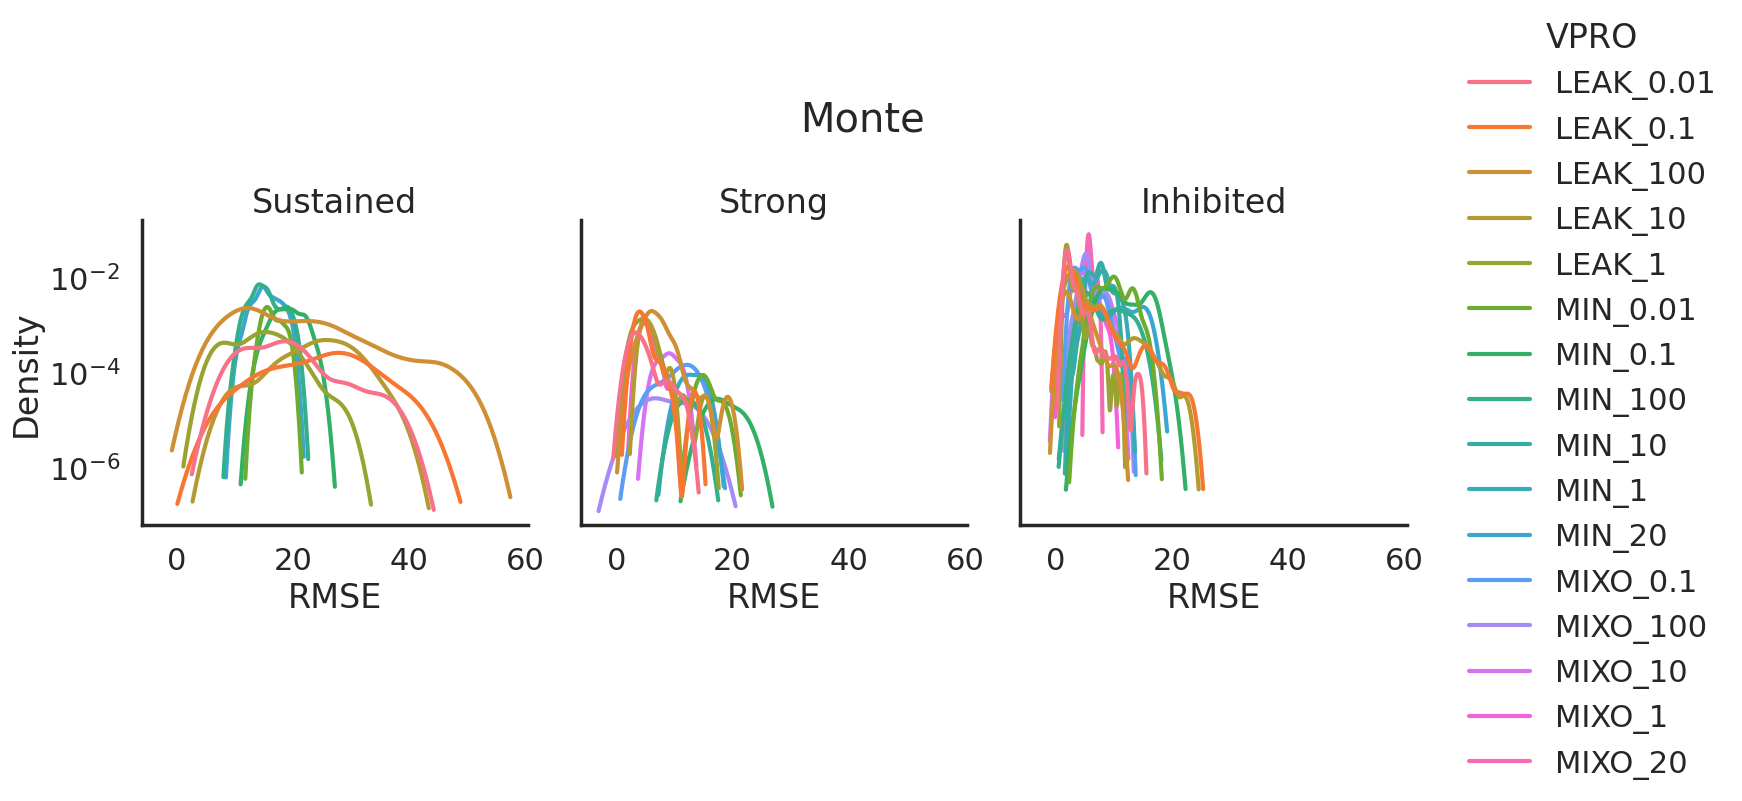

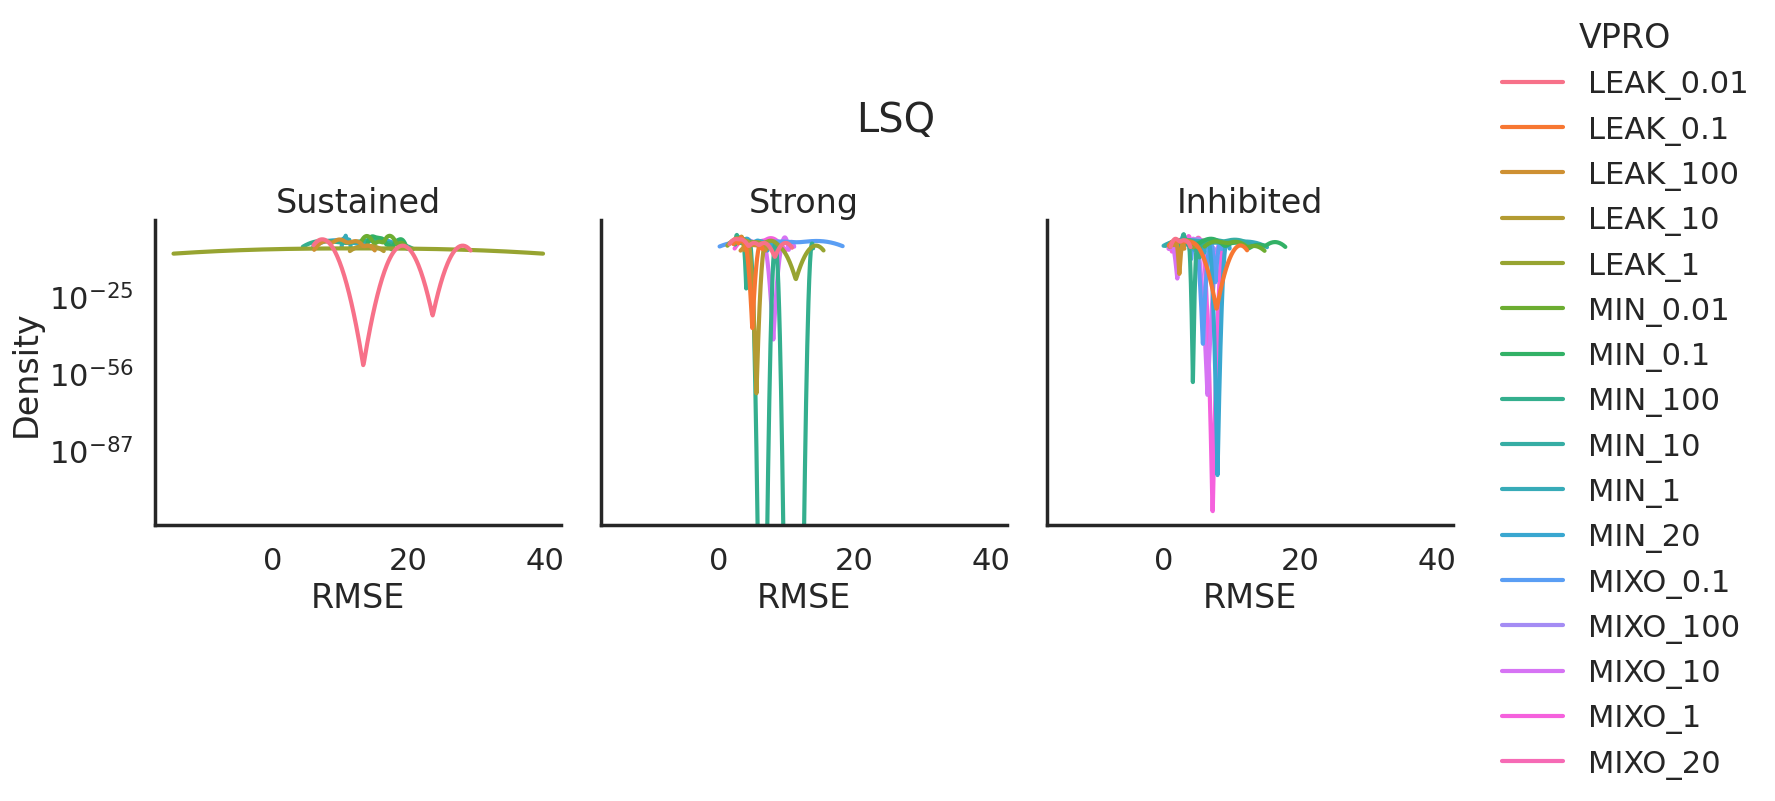

In [50]:
sns.set_context('poster')
for m in ['Monte', 'LSQ']:
    sns.displot(
        data=min_mse_df.loc[min_mse_df['Mode'].isin([m])], 
        x='RMSE', hue='VPRO', #multiple='stack', 
        col='Group', col_order=gorder,
        #row='Model',row_order=morder,
        #element="poly",fill=False,
        kind='kde',
        #hue_order=morder, palette=mpalette,
        #lw=5

    ).set_titles(col_template='{col_name}').set(yscale='log')#, xlim=(0,500)) #xscale='log')
    plt.suptitle(m, y=1.1)

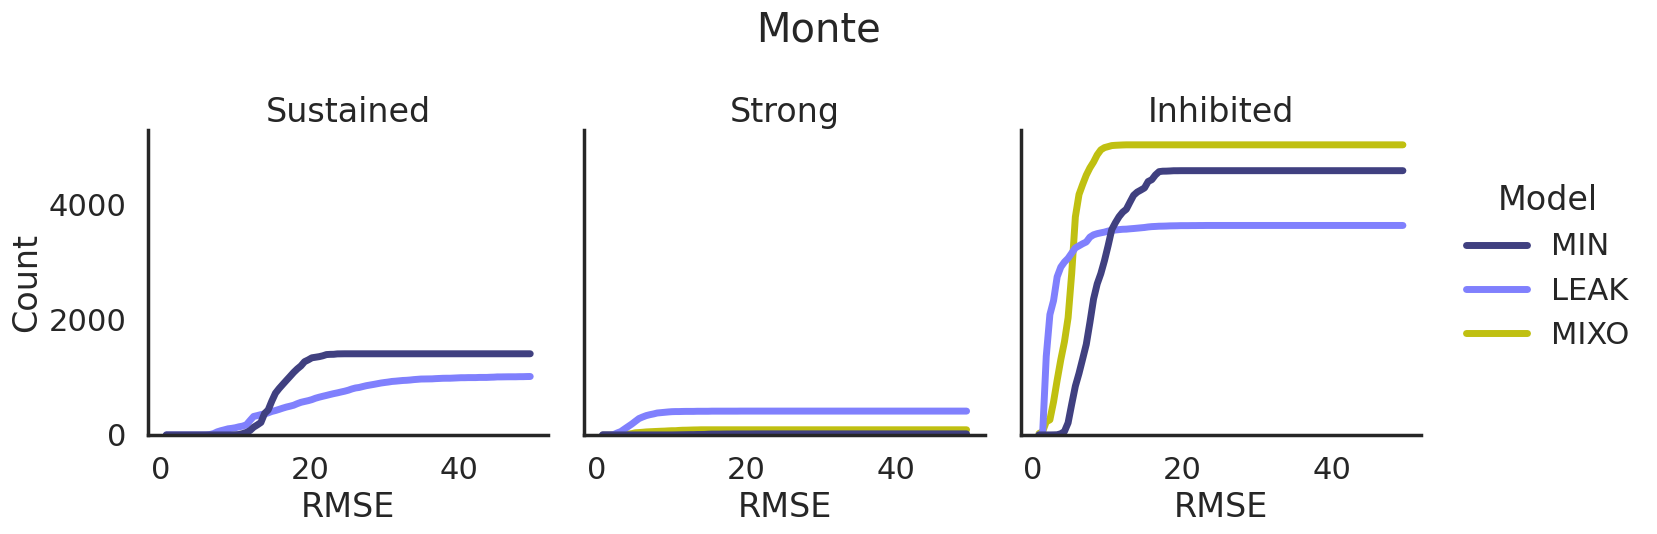

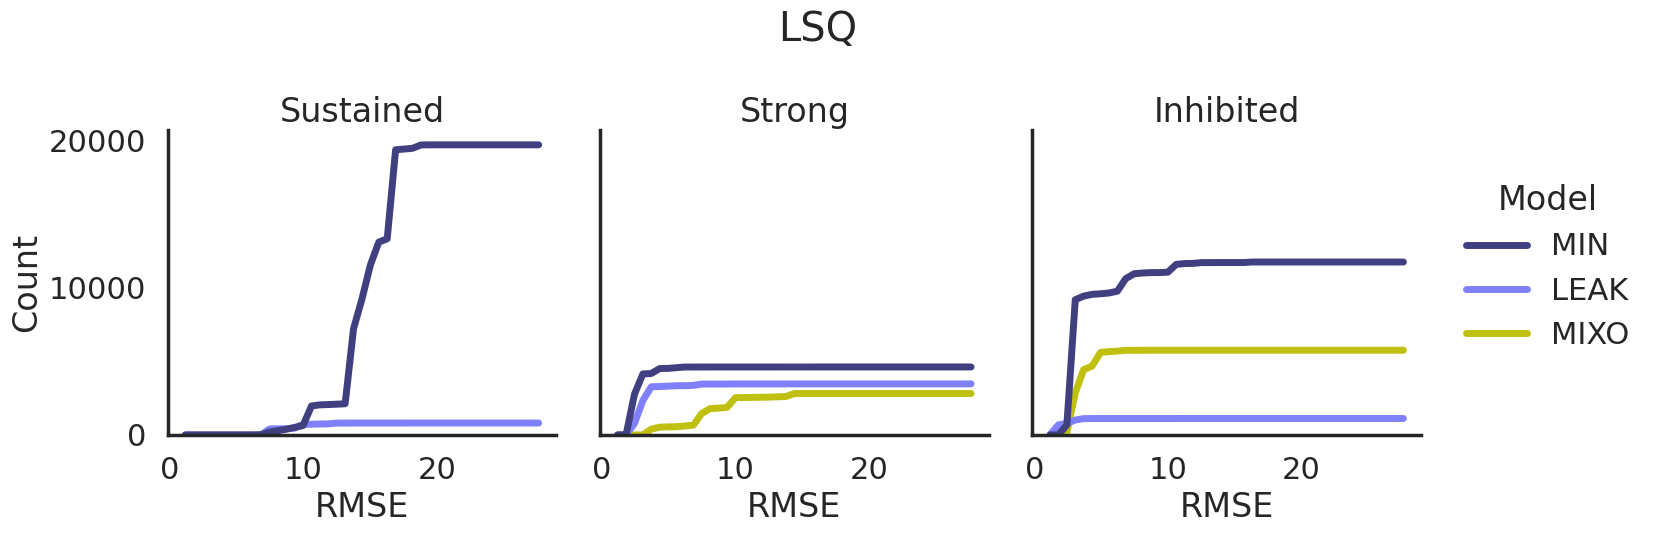

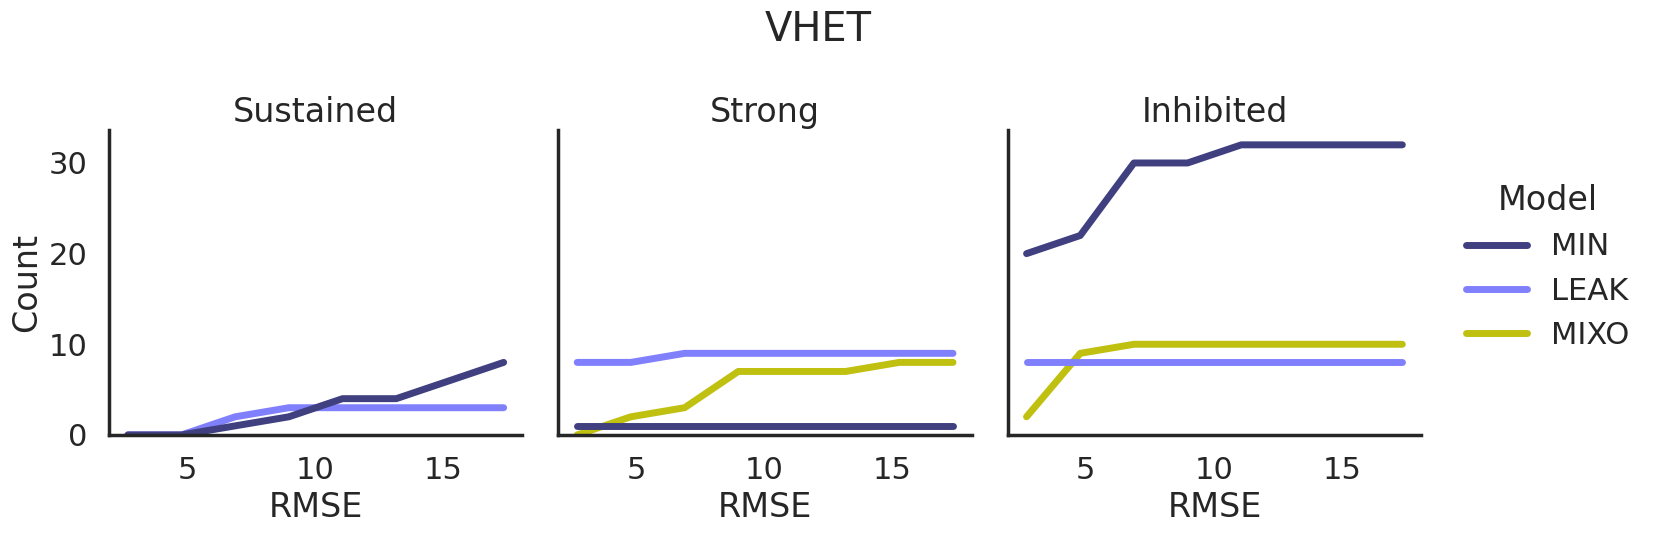

In [51]:
for m in ['Monte', 'LSQ', 'VHET']:
    sns.displot(
        data=min_mse_df.loc[min_mse_df['Mode'].isin([m])], 
        x='RMSE', hue='Model', #multiple='stack', 
        col='Group', col_order=gorder,
        element="poly",fill=False, cumulative=True, 
        hue_order=morder, palette=mpalette,
        lw=5

    ).set_titles(col_template='{col_name}')#.set(yscale='log')#, xlim=(0,500)) #xscale='log')
    plt.suptitle(m, y=1.1)

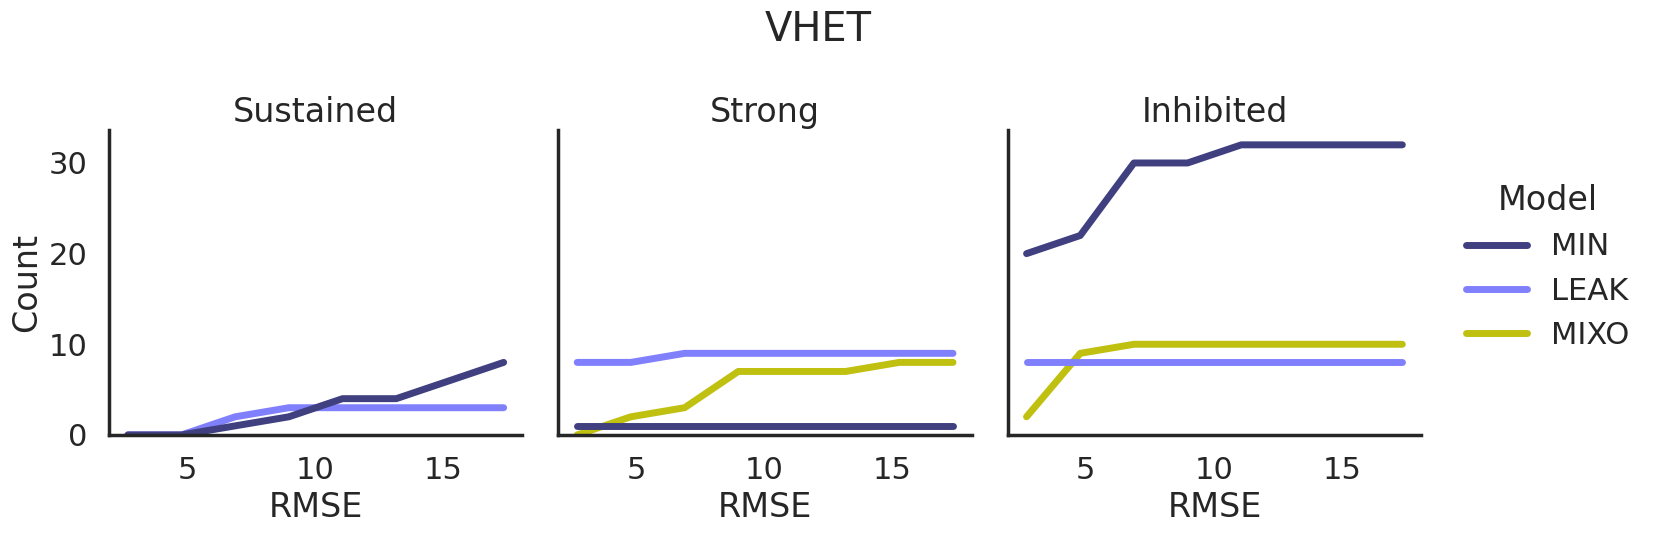

In [52]:
for m in ['VHET']:
    sns.displot(
        data=min_mse_df.loc[min_mse_df['Mode'].isin([m])], 
        x='RMSE', hue='Model', #multiple='stack', 
        col='Group', col_order=gorder,
        element="poly",fill=False, cumulative=True, 
        hue_order=morder, palette=mpalette,
        lw=5

    ).set_titles(col_template='{col_name}')#.set(yscale='log')#, xlim=(0,500)) #xscale='log')
    plt.suptitle(m, y=1.1)

Text(0.5, 1.1, 'VHET')

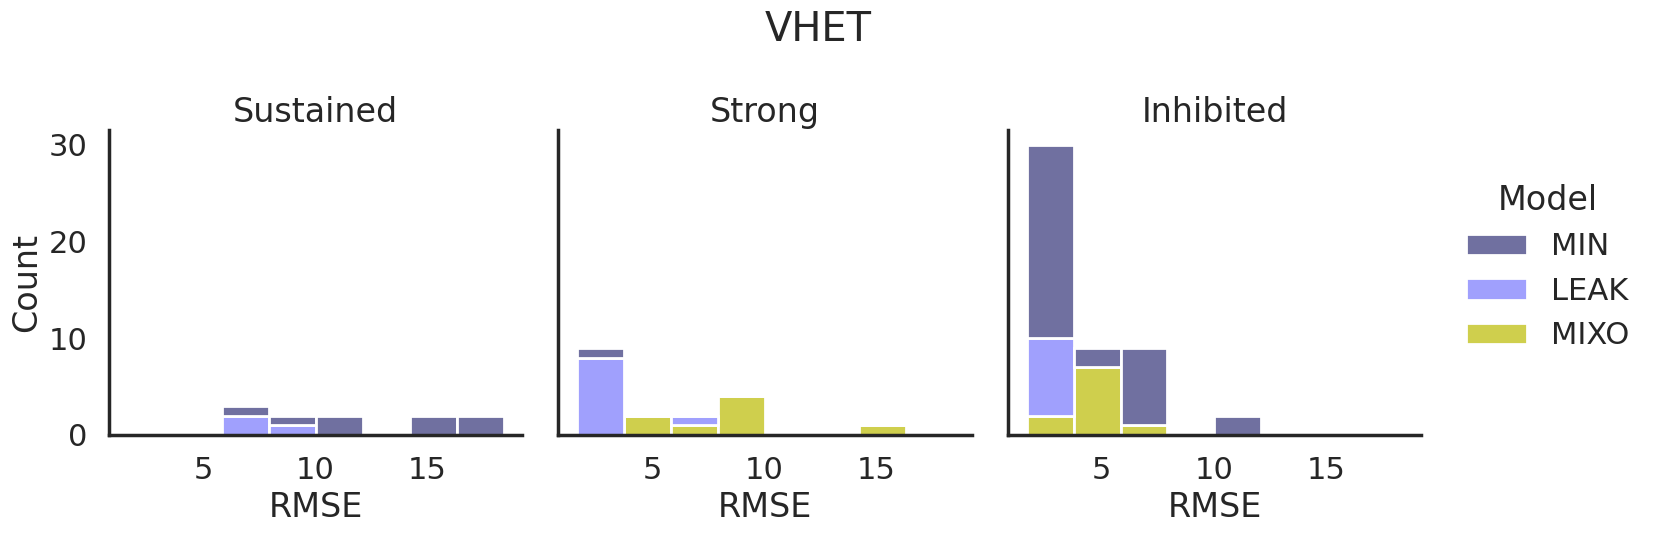

In [53]:
sns.displot(
    data=min_mse_df.loc[min_mse_df['Mode'].isin(['VHET'])], 
    x='RMSE', hue='Model', multiple='stack', 
        col='Group', col_order=gorder,
    #element="step",
    #fill=False
            hue_order=morder, palette=mpalette,

).set_titles(col_template='{col_name}')#.set(yscale='log')#, xlim=(0,500)) #xscale='log')
plt.suptitle('VHET', y=1.1)

Text(0.5, 1.1, 'VHET')

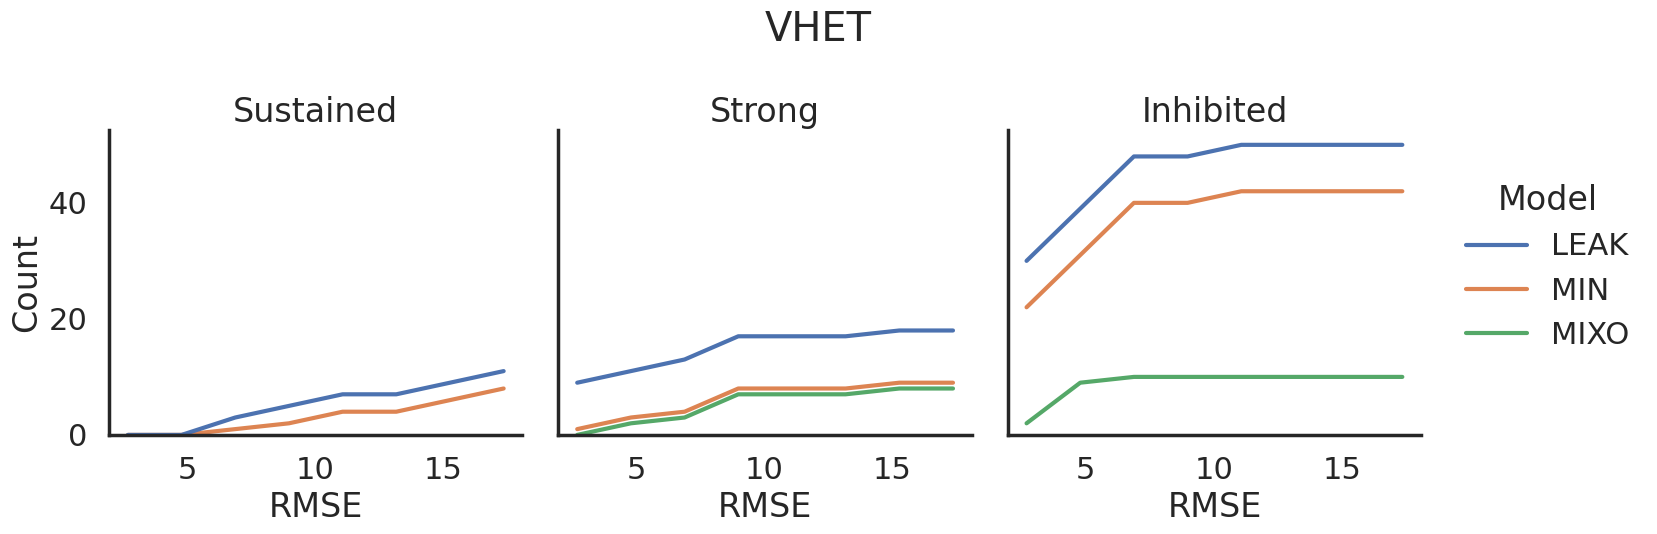

In [54]:
sns.displot(
    data=min_mse_df.loc[min_mse_df['Mode'].isin(['VHET'])], 
    x='RMSE', hue='Model', multiple='stack', 
        col='Group', col_order=gorder,
    #element="step",
    #fill=False
    element="poly",fill=False, cumulative=True, 
    
).set_titles(col_template='{col_name}')#.set(yscale='log')#, xlim=(0,500)) #xscale='log')
plt.suptitle('VHET', y=1.1)

In [55]:
df.loc[df.Mode.isin(['VHET'])]

Bp            Bh         DON       RDON         DIN  \
1212416  1.785714e+00  1.428571e+01   20.000000   0.000000  100.000000   
1212417  4.000003e+00  2.498085e+01   89.930936  17.157206    0.002437   
1212418  3.199406e+00  1.402762e+01   89.146940  29.694899    0.002563   
1212419  2.838788e+00  1.033586e+01   88.897265  33.996870    0.002648   
1212420  2.311644e+00  6.163118e+00   88.634506  38.959330    0.002830   
...               ...           ...         ...        ...         ...   
1218849  2.390101e-09  4.340938e-13  117.680458  18.390822    0.000148   
1218850  7.725622e-10  1.094300e-13  117.680458  18.390822    0.000148   
1218851  3.921598e-10  4.784619e-14  117.680458  18.390822    0.000148   
1218852  1.969731e-10  2.065205e-14  117.680458  18.390822    0.000148   
1218853  3.936018e-11  2.895165e-15  117.680458  18.390822    0.000148   

                DOC        RDOC          DIC       ROS  ABp  ...         day  \
1212416  132.500000    0.000000  2241.552301  0.200000  0.0  ...    0.000000   
1212417   11.165677   77.259169  2222.844128  0.197848  0.0  ...    1.081944   
1212418   37.552192  133.731417  2198.428744  0.195717  0.0  ...    2.164583   
1212419   51.830238  153.114114  2186.908004  0.194580  0.0  ...    2.747222   
1212420   75.138435  175.480223  2170.401824  0.192631  0.0  ...    3.754167   
...             ...         ...          ...       ...  ...  ...         ...   
1218849  778.567212  109.928567  2241.543172  0.065949  0.0  ...  110.943750   
1218850  778.567212  109.928567  2241.546850  0.062794  0.0  ...  115.845833   
1218851  778.567212  109.928567  2241.548301  0.060973  0.0  ...  118.788889   
1218852  778.567212  109.928567  2241.549380  0.059177  0.0  ...  121.777778   
1218853  778.567212  109.928567  2241.550901  0.055182  0.0  ...  128.767361   

                Bp[C]         Bh[C]  ABp[C]  ABh[C]  \
1212416  1.250000e+01  6.428571e+01     0.0     0.0   
1212417  2.800002e+01  1.124138e+02     0.0     0.0   
1212418  2.239584e+01  6.312429e+01     0.0     0.0   
1212419  1.987152e+01  4.651136e+01     0.0     0.0   
1212420  1.618151e+01  2.773403e+01     0.0     0.0   
...               ...           ...     ...     ...   
1218849  1.673071e-08  1.953422e-12     0.0     0.0   
1218850  5.407935e-09  4.924348e-13     0.0     0.0   
1218851  2.745119e-09  2.153079e-13     0.0     0.0   
1218852  1.378811e-09  9.293423e-14     0.0     0.0   
1218853  2.755213e-10  1.302824e-14     0.0     0.0   

                                                    run_id  Model      VPRO  \
1212416  vhet_het_least_square_LEAK_least_square_LEAK_1...   LEAK  LEAK_100   
1212417  vhet_het_least_square_LEAK_least_square_LEAK_1...   LEAK  LEAK_100   
1212418  vhet_het_least_square_LEAK_least_square_LEAK_1...   LEAK  LEAK_100   
1212419  vhet_het_least_square_LEAK_least_square_LEAK_1...   LEAK  LEAK_100   
1212420  vhet_het_least_square_LEAK_least_square_LEAK_1...   LEAK  LEAK_100   
...                                                    ...    ...       ...   
1218849  vhet_het_least_square_MIN_least_square_MIN_100...    MIN   MIN_100   
1218850  vhet_het_least_square_MIN_least_square_MIN_100...    MIN   MIN_100   
1218851  vhet_het_least_square_MIN_least_square_MIN_100...    MIN   MIN_100   
1218852  vhet_het_least_square_MIN_least_square_MIN_100...    MIN   MIN_100   
1218853  vhet_het_least_square_MIN_least_square_MIN_100...    MIN   MIN_100   

         Mode   model/mode  
1212416  VHET  LEAK / VHET  
1212417  VHET  LEAK / VHET  
1212418  VHET  LEAK / VHET  
1212419  VHET  LEAK / VHET  
1212420  VHET  LEAK / VHET  
...       ...          ...  
1218849  VHET   MIN / VHET  
1218850  VHET   MIN / VHET  
1218851  VHET   MIN / VHET  
1218852  VHET   MIN / VHET  
1218853  VHET   MIN / VHET  

[5846 rows x 22 columns]

In [56]:
vhet_tmp_df = min_mse_df.loc[min_mse_df.Mode.isin(['VHET']) & min_mse_df.optimized_for_group.isin(['Strong', 'Sustained'])]
vhet_tmp_df = pd.merge(vhet_tmp_df, vhet1_df, on=['run_id', 'Model', 'Mode', 'VPRO'], how='left')

In [57]:
vhet_tmp_df

Sample                  full name      Group  compare_points        MSE  \
0       4C0  Phaeobacter gallaeciensis  Inhibited            74.0   2.928164   
1       4C0  Phaeobacter gallaeciensis  Inhibited            74.0   2.928164   
2       4C0  Phaeobacter gallaeciensis  Inhibited            74.0   2.928164   
3       4C0  Phaeobacter gallaeciensis  Inhibited            74.0   2.928164   
4       4C0  Phaeobacter gallaeciensis  Inhibited            74.0   2.928164   
...     ...                        ...        ...             ...        ...   
4139   10C0              Marinovum 5F3  Inhibited            74.0  24.992259   
4140   10C0              Marinovum 5F3  Inhibited            74.0  24.992259   
4141   10C0              Marinovum 5F3  Inhibited            74.0  24.992259   
4142   10C0              Marinovum 5F3  Inhibited            74.0  24.992259   
4143   10C0              Marinovum 5F3  Inhibited            74.0  24.992259   

                                                 run_id Model       VPRO  \
0     vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK  LEAK_0.01   
1     vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK  LEAK_0.01   
2     vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK  LEAK_0.01   
3     vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK  LEAK_0.01   
4     vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK  LEAK_0.01   
...                                                 ...   ...        ...   
4139  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO    MIXO_20   
4140  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO    MIXO_20   
4141  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO    MIXO_20   
4142  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO    MIXO_20   
4143  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO    MIXO_20   

      Mode optimized_for  ...          DIC       ROS  ABp  ABh           t  \
0     VHET             2  ...  2241.552301  0.200000  0.0  0.0         0.0   
1     VHET             2  ...  2249.125939  0.197848  0.0  0.0     93480.0   
2     VHET             2  ...  2251.787375  0.195717  0.0  0.0    187020.0   
3     VHET             2  ...  2254.919858  0.194580  0.0  0.0    237360.0   
4     VHET             2  ...  2262.361058  0.192631  0.0  0.0    324360.0   
...    ...           ...  ...          ...       ...  ...  ...         ...   
4139  VHET             7  ...  2241.501474  0.065949  0.0  0.0   9585540.0   
4140  VHET             7  ...  2241.521950  0.062794  0.0  0.0  10009080.0   
4141  VHET             7  ...  2241.530031  0.060973  0.0  0.0  10263360.0   
4142  VHET             7  ...  2241.536038  0.059177  0.0  0.0  10521600.0   
4143  VHET             7  ...  2241.544504  0.055182  0.0  0.0  11125500.0   

             day         Bp[C]         Bh[C]  ABp[C]  ABh[C]  
0       0.000000  1.250000e+01  6.428571e+01     0.0     0.0  
1       1.081944  2.781146e+01  1.686436e+02     0.0     0.0  
2       2.164583  2.800003e+01  1.582676e+02     0.0     0.0  
3       2.747222  2.436956e+01  1.546593e+02     0.0     0.0  
4       3.754167  1.916084e+01  1.450250e+02     0.0     0.0  
...          ...           ...           ...     ...     ...  
4139  110.943750  1.858161e-10  1.077723e-11     0.0     0.0  
4140  115.845833  4.942672e-11  2.866720e-12     0.0     0.0  
4141  118.788889  2.231912e-11  1.294495e-12     0.0     0.0  
4142  121.777778  9.954397e-12  5.773490e-13     0.0     0.0  
4143  128.767361  1.506551e-12  8.737907e-14     0.0     0.0  

[4144 rows x 31 columns]

/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


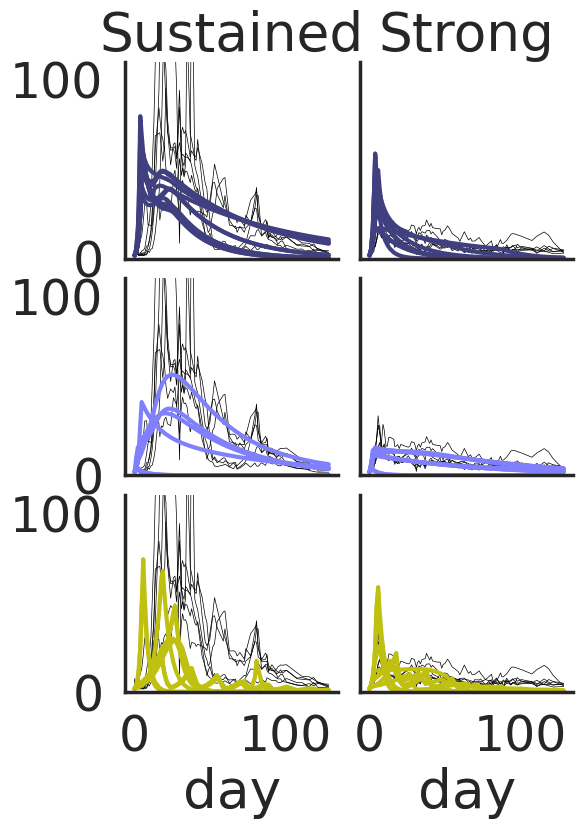

In [58]:
#base_df['model_'] = base_df['model_']
sns.set_context('poster', font_scale=1.6)
g = sns.relplot(
    data=vhet_tmp_df,
    x='day', y='Bp', row='Model', row_order=morder,
    col='optimized_for_group',
    estimator=None, units='run_id', kind='line',
    hue= 'Model', hue_order=morder, 
    palette=mpalette, legend=False, 
    aspect=1.2, height=3,
    facet_kws=dict(margin_titles=True)
)
for (i,j), ax in g.axes_dict.items():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin([j])],
        x='day', y='ref_Bp', lw=0.5, zorder =1,
        estimator=None, units='Sample',
        color='black', ax=ax
    )
#g.set_titles(col_template='{col_name}',)
g.set_titles(row_template='',col_template='{col_name}',)
g.set(ylabel='umol N/L')
g.set(ylabel='')
g.set(ylim=(0,110))
#g.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [59]:
for (i,j), ax in g.axes_dict.items():
    print(j)

Sustained
Strong
Sustained
Strong
Sustained
Strong


In [60]:
min_mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'Model', 'VPRO', 'Mode', 'optimized_for', 'optimized_for_group',
       'model/mode', 'RMSE', 'Group_thrs'],
      dtype='object')

In [61]:
min_mse_df.loc[
    min_mse_df.Model.isin(['MIXO']) &
    min_mse_df['Mode'].isin(['VHET']),
    ['optimized_for','Sample', 'full name', 'Group', 'RMSE', 'MSE', 'run_id',
       'Model', 'Mode',  'model/mode']
].sort_values('optimized_for')

optimized_for Sample                       full name      Group  \
66208             2    7B0  Sulfitobacter pseudonitzschiae     Strong   
66222             2   10C0                   Marinovum 5F3  Inhibited   
66219             2    7B0  Sulfitobacter pseudonitzschiae     Strong   
66212             2    3B0     Marinobacter adhaerens HP15  Inhibited   
66216             2    7B0  Sulfitobacter pseudonitzschiae     Strong   
66213             5    3B0     Marinobacter adhaerens HP15  Inhibited   
66217             5    7B0  Sulfitobacter pseudonitzschiae     Strong   
66220             5    7B0  Sulfitobacter pseudonitzschiae     Strong   
66209             5    7B0  Sulfitobacter pseudonitzschiae     Strong   
66223             5   10C0                   Marinovum 5F3  Inhibited   
66214             6   10A0                   Marinovum 5F3  Inhibited   
66224             6   10C0                   Marinovum 5F3  Inhibited   
66210             6    9B0                         E. coli  Inhibited   
66215             7    3B0     Marinobacter adhaerens HP15  Inhibited   
66218             7   10A0                   Marinovum 5F3  Inhibited   
66221             7    7C0  Sulfitobacter pseudonitzschiae     Strong   
66211             7    7B0  Sulfitobacter pseudonitzschiae     Strong   
66225             7   10C0                   Marinovum 5F3  Inhibited   

            RMSE         MSE  \
66208  14.655943  214.796659   
66222   6.605927   43.638271   
66219   7.815790   61.086580   
66212   5.111968   26.132214   
66216   9.778112   95.611477   
66213   5.130627   26.323335   
66217   9.762561   95.307604   
66220   8.160439   66.592762   
66209   8.349303   69.710863   
66223   4.974469   24.745346   
66214   2.667030    7.113049   
66224   5.099369   26.003565   
66210   2.805862    7.872860   
66215   4.809053   23.126994   
66218   4.278402   18.304724   
66221   3.987844   15.902896   
66211   3.795165   14.403277   
66225   4.999226   24.992259   

                                                  run_id Model  Mode  \
66208  vhet_het_least_square_MIXO_least_square_MIXO_0...  MIXO  VHET   
66222  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO  VHET   
66219  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66212  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66216  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66213  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66217  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66220  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66209  vhet_het_least_square_MIXO_least_square_MIXO_0...  MIXO  VHET   
66223  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO  VHET   
66214  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66224  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO  VHET   
66210  vhet_het_least_square_MIXO_least_square_MIXO_0...  MIXO  VHET   
66215  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66218  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66221  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO  VHET   
66211  vhet_het_least_square_MIXO_least_square_MIXO_0...  MIXO  VHET   
66225  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO  VHET   

        model/mode  
66208  MIXO / VHET  
66222  MIXO / VHET  
66219  MIXO / VHET  
66212  MIXO / VHET  
66216  MIXO / VHET  
66213  MIXO / VHET  
66217  MIXO / VHET  
66220  MIXO / VHET  
66209  MIXO / VHET  
66223  MIXO / VHET  
66214  MIXO / VHET  
66224  MIXO / VHET  
66210  MIXO / VHET  
66215  MIXO / VHET  
66218  MIXO / VHET  
66221  MIXO / VHET  
66211  MIXO / VHET  
66225  MIXO / VHET

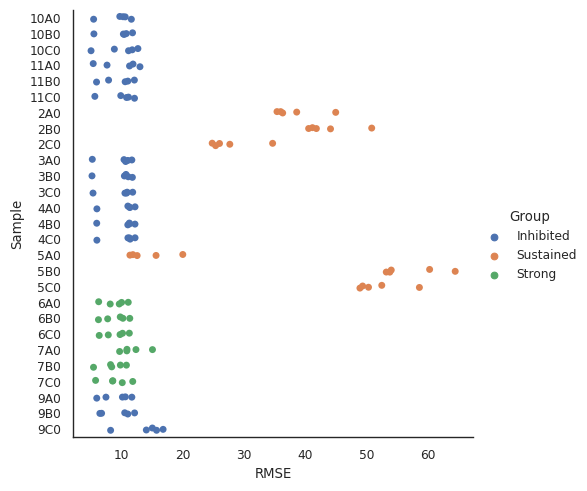

In [62]:
sns.set_context('paper')
sns.catplot(
    data=mse_df.loc[
    mse_df.Model.isin(['MIXO']) &
    mse_df['Mode'].isin(['VHET']) &
    mse_df['optimized_for'].isin(['5']),
    ['optimized_for','Sample', 'full name', 'Group', 'RMSE', 'MSE', 'run_id',
       'Model', 'Mode',  'model/mode', ]
],
    y='Sample',
    x='RMSE',
    hue='Group'
)

In [63]:
sns.set_context('poster')

In [64]:
min_mse_df.loc[min_mse_df.Group.isin(['Sustained', 'Strong'])].nsmallest(columns='MSE', n=10)

Sample                       full name   Group  compare_points  \
50291    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
54760    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
54262    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
50651    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
5296     7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
5304     7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
5367     7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
5356     7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
5321     7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
5252     7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   

            MSE                                             run_id Model  \
50291  5.346191  het_monte_LEAK_least_square_LEAK_0.01_379_h-88...  LEAK   
54760  5.661035  het_monte_LEAK_least_square_LEAK_1_765_h667989...  LEAK   
54262  5.870436  het_monte_LEAK_least_square_LEAK_1_314_h155936...  LEAK   
50651  5.943998  het_monte_LEAK_least_square_LEAK_0.01_708_h613...  LEAK   
5296   6.004169  het_least_square_LEAK_least_square_LEAK_1_7_1_...  LEAK   
5304   6.004170  het_least_square_LEAK_least_square_LEAK_1_7_1_...  LEAK   
5367   6.004170  het_least_square_LEAK_least_square_LEAK_1_7_1_...  LEAK   
5356   6.004170  het_least_square_LEAK_least_square_LEAK_1_7_1_...  LEAK   
5321   6.004170  het_least_square_LEAK_least_square_LEAK_1_7_1_...  LEAK   
5252   6.004170  het_least_square_LEAK_least_square_LEAK_1_7_1_...  LEAK   

            VPRO   Mode optimized_for optimized_for_group    model/mode  \
50291  LEAK_0.01  Monte           NaN                 NaN  LEAK / Monte   
54760     LEAK_1  Monte           NaN                 NaN  LEAK / Monte   
54262     LEAK_1  Monte           NaN                 NaN  LEAK / Monte   
50651  LEAK_0.01  Monte           NaN                 NaN  LEAK / Monte   
5296      LEAK_1    LSQ           NaN                 NaN    LEAK / LSQ   
5304      LEAK_1    LSQ           NaN                 NaN    LEAK / LSQ   
5367      LEAK_1    LSQ           NaN                 NaN    LEAK / LSQ   
5356      LEAK_1    LSQ           NaN                 NaN    LEAK / LSQ   
5321      LEAK_1    LSQ           NaN                 NaN    LEAK / LSQ   
5252      LEAK_1    LSQ           NaN                 NaN    LEAK / LSQ   

           RMSE Group_thrs  
50291  2.312183     Strong  
54760  2.379293     Strong  
54262  2.422898     Strong  
50651  2.438032     Strong  
5296   2.450341     Strong  
5304   2.450341     Strong  
5367   2.450341     Strong  
5356   2.450341     Strong  
5321   2.450341     Strong  
5252   2.450341     Strong

In [65]:
runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte'])].groupby('Model')['run_id'].sample(500)


In [70]:
sns.color_palette('Paired')

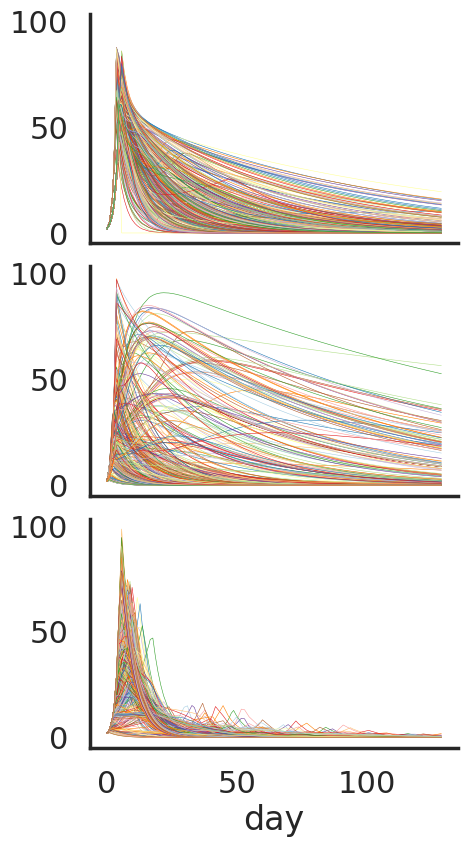

In [72]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
sns.relplot(
    data=mdf.loc[mdf.variable.isin(['Bp']) & mdf.run_id.isin(runids)],
    x='day',
    y='value',
    hue='run_id', #hue_order=gorder,
    kind='line', lw=0.4,
    estimator=None, units='run_id', palette='Paired',
    row='Model', row_order=morder,
    legend=False,
        aspect=2, height=3,
    facet_kws=dict(margin_titles=True)

).set_titles(row_template='').set(ylabel='', )
#.set(ylabel='umol N/L')
#plt.suptitle('Montecarlo')
plt.subplots_adjust(hspace=0.1, wspace=0.1)

#plt.yscale('log')
plt.show()

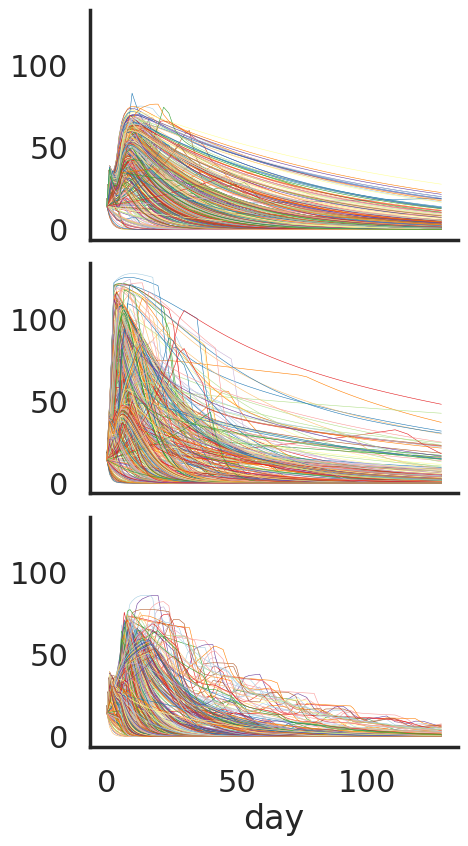

In [73]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
sns.relplot(
    data=mdf.loc[mdf.variable.isin(['Bh']) & mdf.run_id.isin(runids)],
    x='day',
    y='value',
    hue='run_id', #hue_order=gorder,
    kind='line', lw=0.4,
    estimator=None, units='run_id', palette='Paired',
    row='Model', row_order=morder,
    legend=False,
        aspect=2, height=3,
    facet_kws=dict(margin_titles=True)

).set_titles(row_template='').set(ylabel='', )
#.set(ylabel='umol N/L')
#plt.suptitle('Montecarlo')
plt.subplots_adjust(hspace=0.1, wspace=0.1)

#plt.yscale('log')
plt.show()

In [215]:
lowest_ids = min_mse_df.loc[min_mse_df.Group.isin(['Sustained', 'Strong'])].nsmallest(columns='MSE', n=10)['run_id']

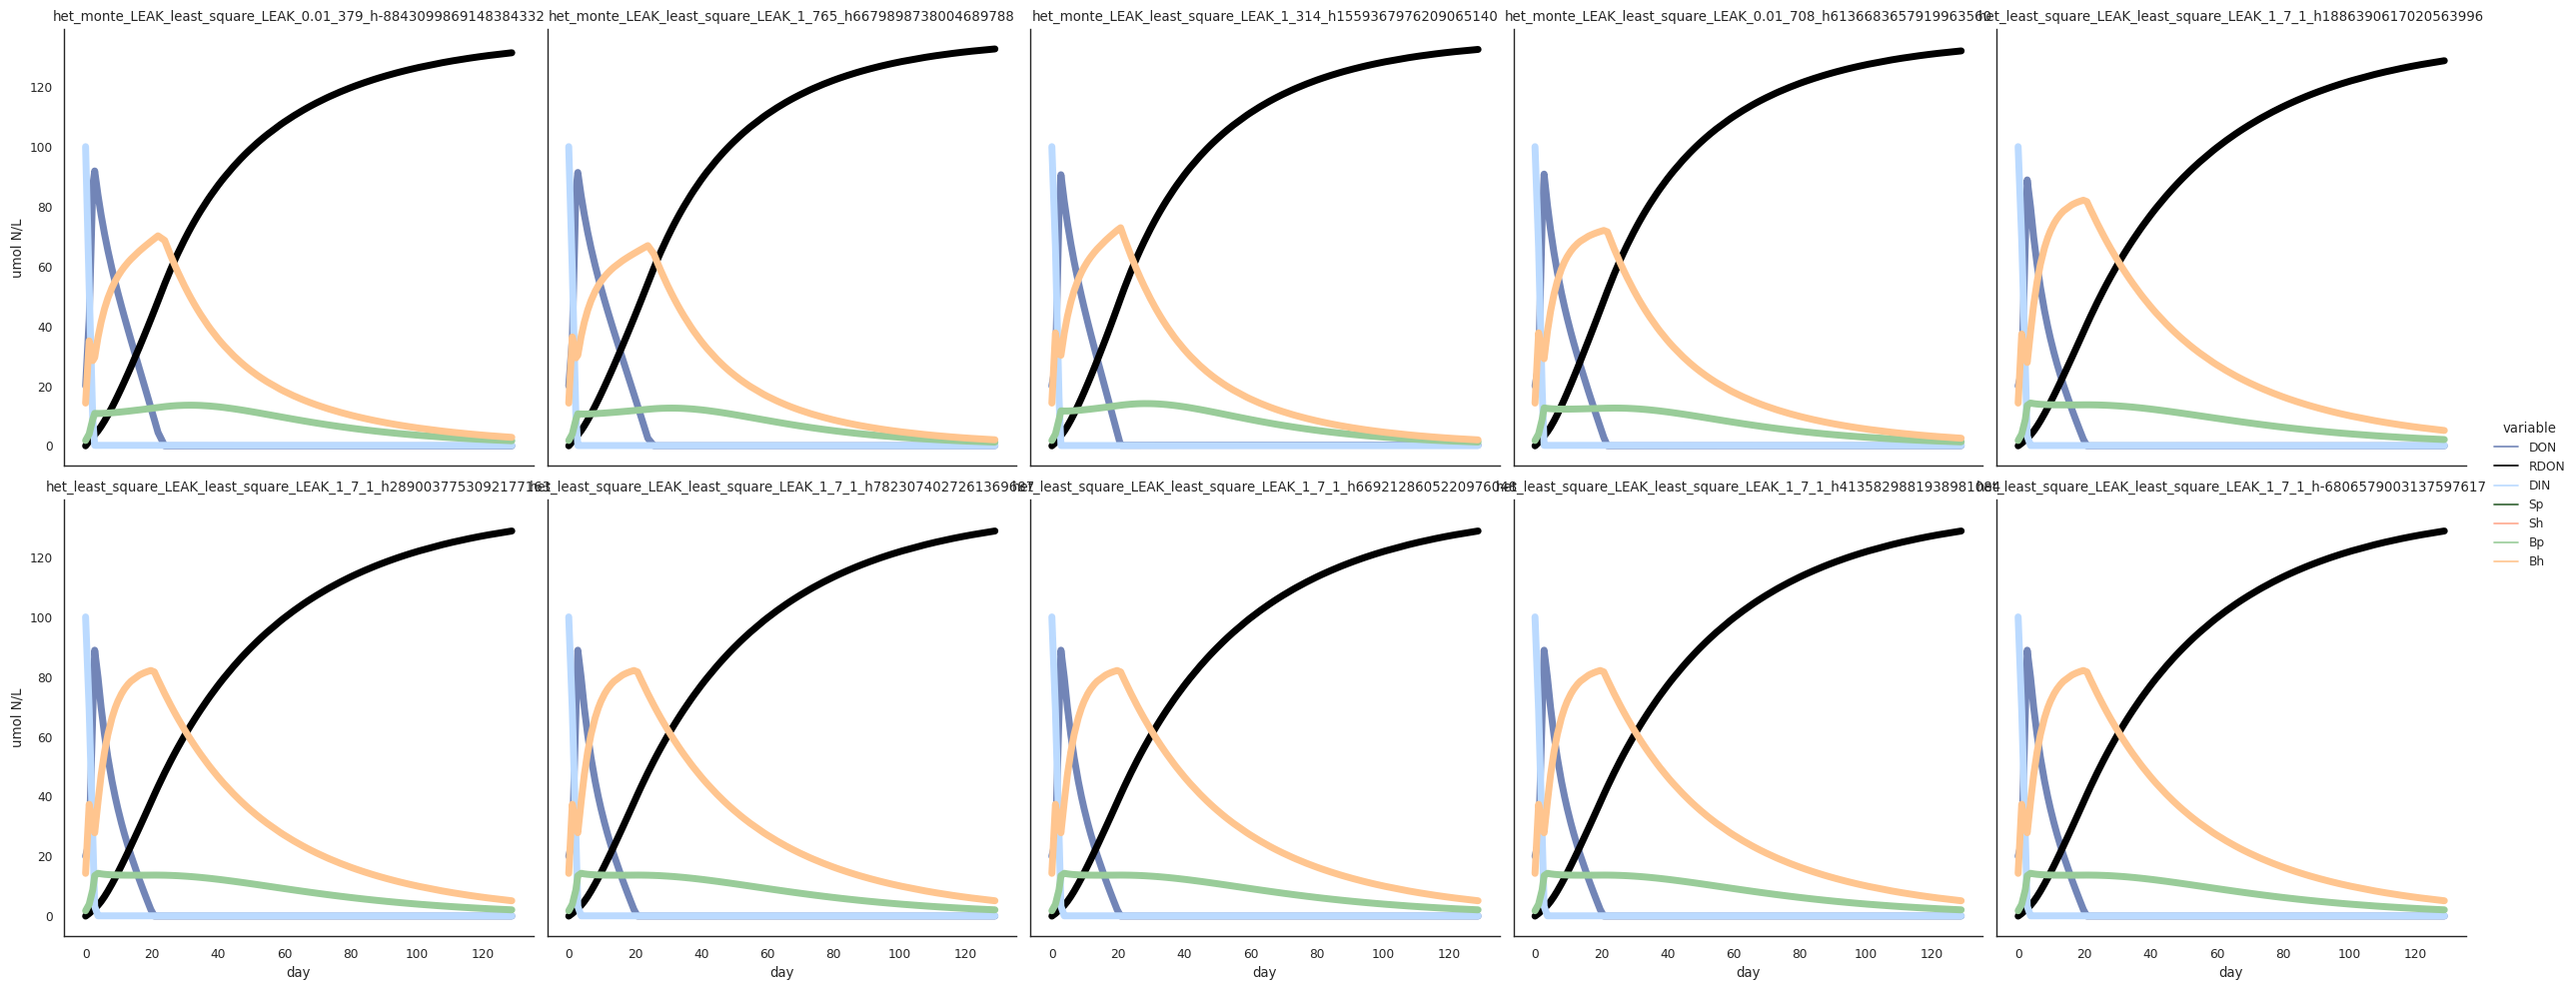

In [276]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

#g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [103]:
lowest_ids


42024    het_monte_LEAK_least_square_LEAK_0.01_379_h-88...
46493    het_monte_LEAK_least_square_LEAK_1_765_h667989...
45995    het_monte_LEAK_least_square_LEAK_1_314_h155936...
42384    het_monte_LEAK_least_square_LEAK_0.01_708_h613...
42345    het_monte_LEAK_least_square_LEAK_0.01_673_h194...
42496    het_monte_LEAK_least_square_LEAK_0.01_813_h-31...
42616    het_monte_LEAK_least_square_LEAK_0.01_927_h-74...
42429    het_monte_LEAK_least_square_LEAK_0.01_74_h1731...
46110    het_monte_LEAK_least_square_LEAK_1_418_h847665...
41952    het_monte_LEAK_least_square_LEAK_0.01_313_h-60...
Name: run_id, dtype: object

In [217]:
import hdbscan


In [218]:
import umap

In [223]:
mdf.day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [224]:
sample_cols_umap = ['Bp', 'Bh', 'DON', 'DIN', 'DOC', ]
sample_cols_HDBSCAN = ['Bp', 'Bh',]

#sample_days = [ 5, 12, 16, 19, 40, 65]
sample_days = [ 5, 9, 12, 17, 25, 42, 60, 91]




In [233]:
runids = min_mse_df.loc[
    min_mse_df.Mode.isin(['Monte', 'VHET']) ,'run_id']


In [394]:
runids = min_mse_df.loc[
    min_mse_df.Mode.isin(['Monte', 'VHET']) #|
    #min_mse_df.Mode.isin(['Monte', 'VHET']) |
    #(min_mse_df.Group.isin(['Strong', 'Sustained']) & (min_mse_df.RMSE<20))
    ,'run_id']


In [395]:
runids

49963    het_monte_LEAK_least_square_LEAK_0.01_0_h-5791...
49964    het_monte_LEAK_least_square_LEAK_0.01_1000_h-5...
49965    het_monte_LEAK_least_square_LEAK_0.01_1001_h-4...
49966    het_monte_LEAK_least_square_LEAK_0.01_1002_h82...
49967    het_monte_LEAK_least_square_LEAK_0.01_1003_h34...
                               ...                        
66221    vhet_het_least_square_MIXO_least_square_MIXO_1...
66222    vhet_het_least_square_MIXO_least_square_MIXO_2...
66223    vhet_het_least_square_MIXO_least_square_MIXO_2...
66224    vhet_het_least_square_MIXO_least_square_MIXO_2...
66225    vhet_het_least_square_MIXO_least_square_MIXO_2...
Name: run_id, Length: 16263, dtype: object

In [396]:
tdf = mdf.loc[#mdf.day.round(0).isin(sample_days) &
    mdf.run_id.isin(runids) &
               mdf.variable.isin(sample_cols_umap) 
              #& mdf.run_id.isin(sum_df.run_id)
              #& mdf.run_id.isin(pos_run_ids2)
              #& ~mdf.run_id.isin(neg_ids)
             ]
#tdf['day0'] = tdf.day.round(0)
Xu = tdf.pivot(index='run_id', columns=['variable', 'day'], values=['value'])

In [397]:
Xu

value             \
variable                                                   Bp              
day                                                0.000000   1.081944     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_0_h-57916...   1.785714   2.415921   
het_monte_LEAK_least_square_LEAK_0.01_1000_h-50...   1.785714   3.973065   
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...   1.785714   3.973065   
het_monte_LEAK_least_square_LEAK_0.01_1002_h823...   1.785714   3.973064   
het_monte_LEAK_least_square_LEAK_0.01_1003_h349...   1.785714   3.973063   
...                                                       ...        ...   
vhet_het_least_square_MIXO_least_square_MIXO_1_7_1   1.785714   4.011719   
vhet_het_least_square_MIXO_least_square_MIXO_20...   1.785714   3.841484   
vhet_het_least_square_MIXO_least_square_MIXO_20...   1.785714   3.809825   
vhet_het_least_square_MIXO_least_square_MIXO_20...   1.785714   3.807118   
vhet_het_least_square_MIXO_least_square_MIXO_20...   1.785714   3.809581   

                                                                          \
variable                                                                   
day                                                2.164583   2.747222     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_0_h-57916...   1.812284   1.552499   
het_monte_LEAK_least_square_LEAK_0.01_1000_h-50...   5.562513   4.882078   
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...   8.844279  13.604862   
het_monte_LEAK_least_square_LEAK_0.01_1002_h823...   8.844264  13.604827   
het_monte_LEAK_least_square_LEAK_0.01_1003_h349...   8.844247  13.604775   
...                                                       ...        ...   
vhet_het_least_square_MIXO_least_square_MIXO_1_7_1   7.826403  11.188541   
vhet_het_least_square_MIXO_least_square_MIXO_20...   8.166929  12.260558   
vhet_het_least_square_MIXO_least_square_MIXO_20...   8.093927  12.144373   
vhet_het_least_square_MIXO_least_square_MIXO_20...   8.084724  12.127569   
vhet_het_least_square_MIXO_least_square_MIXO_20...   8.093526  12.143824   

                                                                          \
variable                                                                   
day                                                3.754167   4.701389     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_0_h-57916...   1.188229   0.923963   
het_monte_LEAK_least_square_LEAK_0.01_1000_h-50...   3.892815   3.143524   
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...  28.637042  32.011061   
het_monte_LEAK_least_square_LEAK_0.01_1002_h823...  13.497191  11.386373   
het_monte_LEAK_least_square_LEAK_0.01_1003_h349...  28.636671  33.180349   
...                                                       ...        ...   
vhet_het_least_square_MIXO_least_square_MIXO_1_7_1  11.923521  11.949091   
vhet_het_least_square_MIXO_least_square_MIXO_20...  24.774051  48.125736   
vhet_het_least_square_MIXO_least_square_MIXO_20...  24.506583  47.478196   
vhet_het_least_square_MIXO_least_square_MIXO_20...  24.460595  47.363600   
vhet_het_least_square_MIXO_least_square_MIXO_20...  24.505309  47.474669   

                                                                          \
variable                                                                   
day                                                5.720139   6.731944     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_0_h-57916...   0.704947   0.538837   
het_monte_LEAK_least_square_LEAK_0.01_1000_h-50...   2.496296   1.984520   
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...  31.609443  31.507367   
het_monte_LEAK_least_square_LEAK_0.01_1002_h823...   9.443994   7.827378   
het_monte_LEAK_least_squa

In [398]:
reducer = umap.UMAP(random_state=1234, verbose=True, min_dist=0)
umap_embedding = reducer.fit_transform(Xu)

UMAP(min_dist=0, random_state=1234, verbose=True)
Wed Jul 12 22:17:10 2023 Construct fuzzy simplicial set
Wed Jul 12 22:17:10 2023 Finding Nearest Neighbors
Wed Jul 12 22:17:10 2023 Building RP forest with 11 trees
Wed Jul 12 22:17:10 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Wed Jul 12 22:17:10 2023 Finished Nearest Neighbor Search
Wed Jul 12 22:17:10 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Jul 12 22:17:23 2023 Finished embedding


In [557]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [558]:
#udf['run_id'] = Xufull.index
udf['run_id'] = Xu.index


In [559]:
udf = pd.merge(udf, min_mse_df, on='run_id', how='left')

In [560]:
sns.set_context('paper')

In [561]:
udf.columns

Index(['UMAP1', 'UMAP2', 'run_id', 'Sample', 'full name', 'Group',
       'compare_points', 'MSE', 'Model', 'Mode', 'VPRO', 'optimized_for',
       'mode', 'model/mode', 'RMSE', 'Group_thrs'],
      dtype='object')

In [562]:
udf.shape

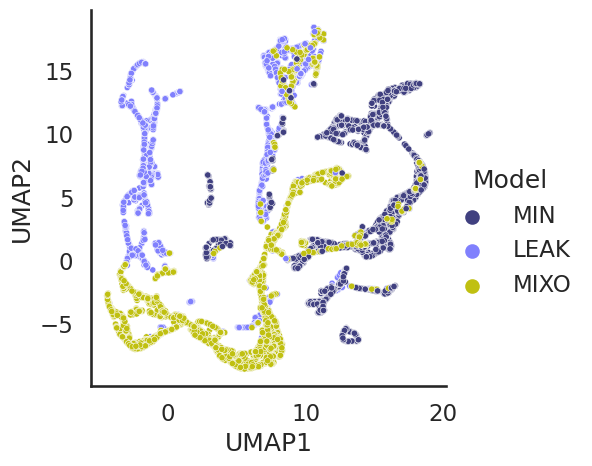

In [765]:
sns.set_context('talk')
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Model', s=20, hue_order=morder, palette=mpalette
)

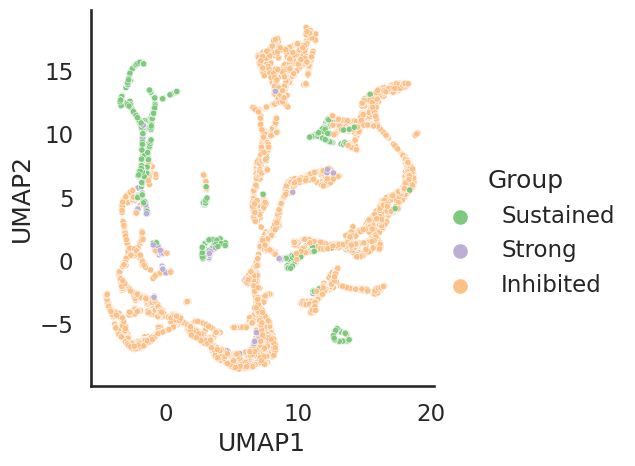

In [764]:
sns.set_context('talk')
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Group', s=20, hue_order=gorder, palette=gpalette
)

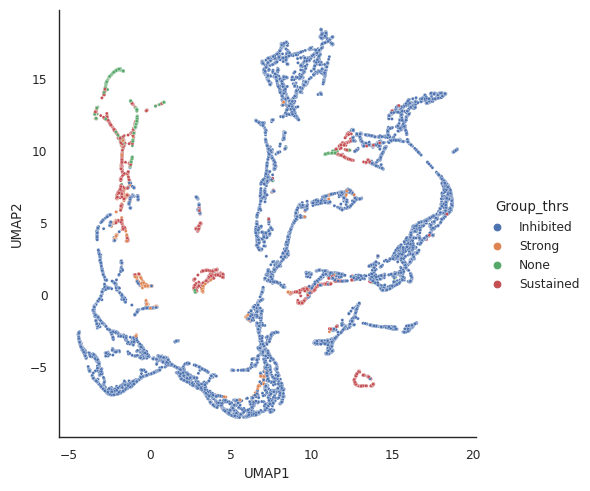

In [564]:
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Group_thrs', s=5, #palette='fire'
)

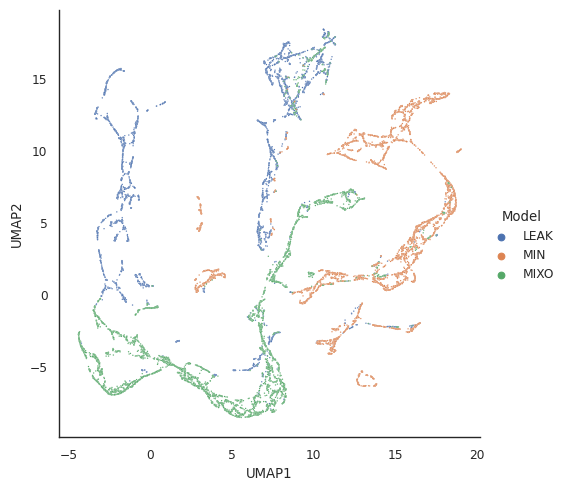

In [565]:
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Model', s=1, #palette='fire'
)

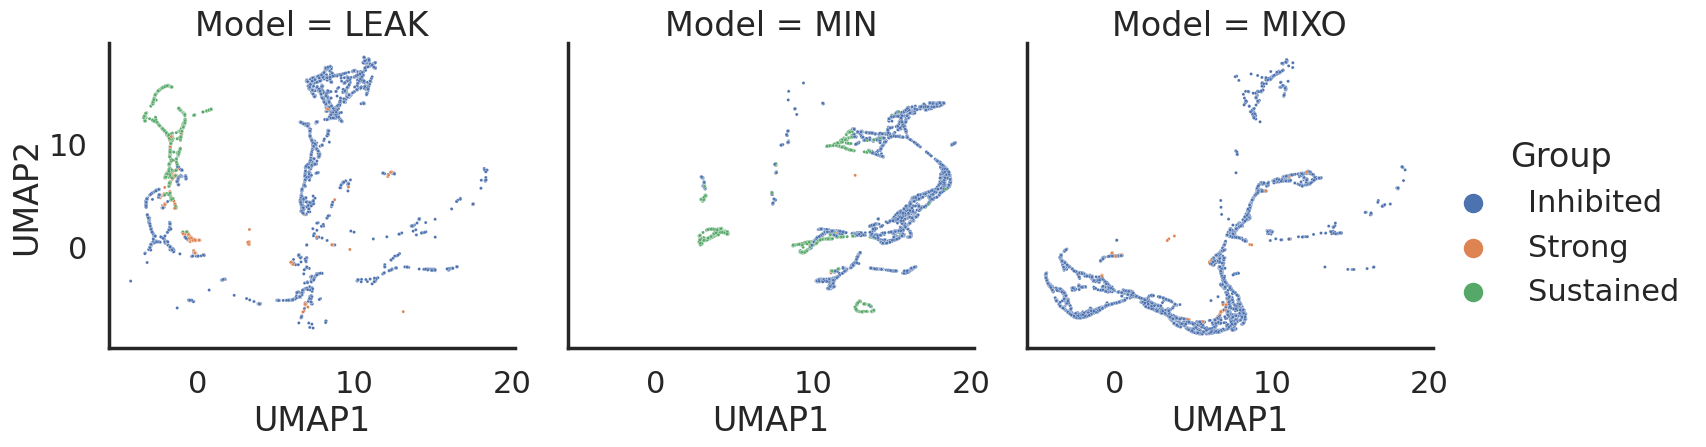

In [761]:
udf['model / Group'] = udf['Model'] + ', ' + udf['Group']
sns.relplot(
    data=udf, hue='Group',
    x='UMAP1',y='UMAP2',
    col='Model', s=5, #palette='fire'
)

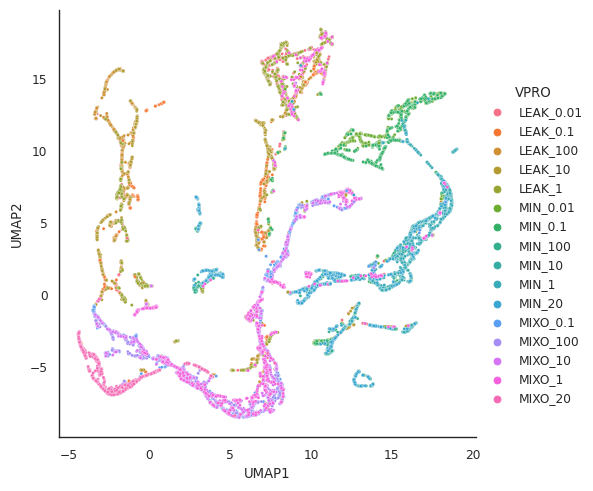

In [567]:
#udf['VPRO'] = udf['Model'] + ', ' + udf['Group']
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='VPRO', s=5, #palette='fire'
)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

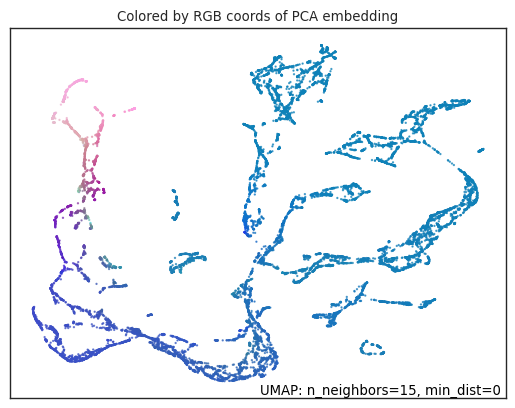

In [409]:
umap.plot.diagnostic(reducer, diagnostic_type='pca')

In [568]:
y = udf['Group_thrs'].map({'Inhibited' : 1, 'Strong' : 2, 'None' : -1, 'Sustained' : 3})
y.unique()

array([ 1,  2, -1,  3])

In [569]:
clusterable_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=10,
    random_state=42,
    verbose=True,
)
    
clusterable_embedding = clusterable_reducer.fit_transform(Xu, y=y)

UMAP(min_dist=0.0, n_components=10, n_neighbors=30, random_state=42, verbose=True)
Mon Jul 17 11:05:38 2023 Construct fuzzy simplicial set
Mon Jul 17 11:05:38 2023 Finding Nearest Neighbors
Mon Jul 17 11:05:38 2023 Building RP forest with 11 trees
Mon Jul 17 11:05:38 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	Stopping threshold met -- exiting after 2 iterations
Mon Jul 17 11:05:39 2023 Finished Nearest Neighbor Search
Mon Jul 17 11:05:40 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Jul 17 11:06:15 2023 Finished embedding


In [570]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=10, 
    #verbose=True,
    prediction_data=True,
    #core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 10.0,
    #cluster_selection_method='leaf'
)
labels = clusterer.fit_predict(clusterable_embedding)
# labels = hdbscan.HDBSCAN(
#     min_samples=10,
#     min_cluster_size=500,
# ).fit_predict(clusterable_embedding)

In [571]:
clusterer.labels_

array([ 4,  3, -1, ...,  3,  3,  3])

In [572]:
clusterer.labels_.max()

5

In [573]:
(clusterer.labels_ < 0).sum()

832

In [574]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 832, 1056, 1253, 1467, 8243, 1310, 2102]))

In [575]:
udf.shape

In [576]:
udf['cluster'] = clusterer.labels_

In [577]:
udf.pivot_table(index='cluster', columns='Group_thrs', fill_value=0, aggfunc='count', values='Mode')

Group_thrs  Inhibited  None  Strong  Sustained
cluster                                       
-1                233    63     291        245
 0                  0    23      10       1023
 1                 18   423     216        596
 2               1467     0       0          0
 3               8198     5      17         23
 4               1296     6       2          6
 5               2079    10       1         12

In [702]:
sns.set_context('talk')

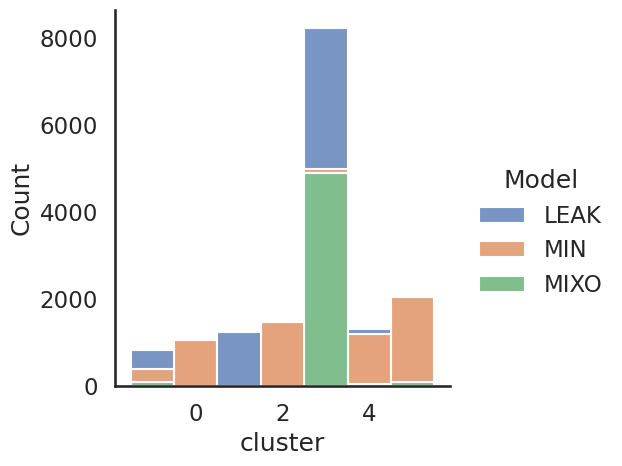

In [711]:
sns.displot(data=udf, x='cluster', hue='Model', discrete=True, multiple='stack')

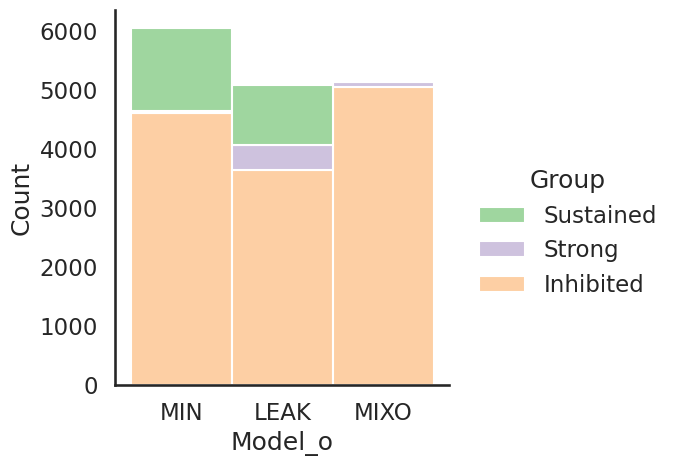

In [710]:
udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=udf, hue='Group', x='Model_o',  discrete=True, multiple='stack',
    #order=morder,
    hue_order=gorder, palette=gpalette, #stat='frequency',
            
           )

In [737]:
min_mse_df['VPRO'].str.get(0)

0        L
1        L
2        L
3        L
4        L
        ..
66221    M
66222    M
66223    M
66224    M
66225    M
Name: VPRO, Length: 66226, dtype: object

In [748]:
min_mse_df['short_VPRO'] = min_mse_df['VPRO'].str.get(2) + min_mse_df['VPRO'].str.split('_', expand=True)[1]
udf['short_VPRO'] = udf['VPRO'].str.get(2) + udf['VPRO'].str.split('_', expand=True)[1]

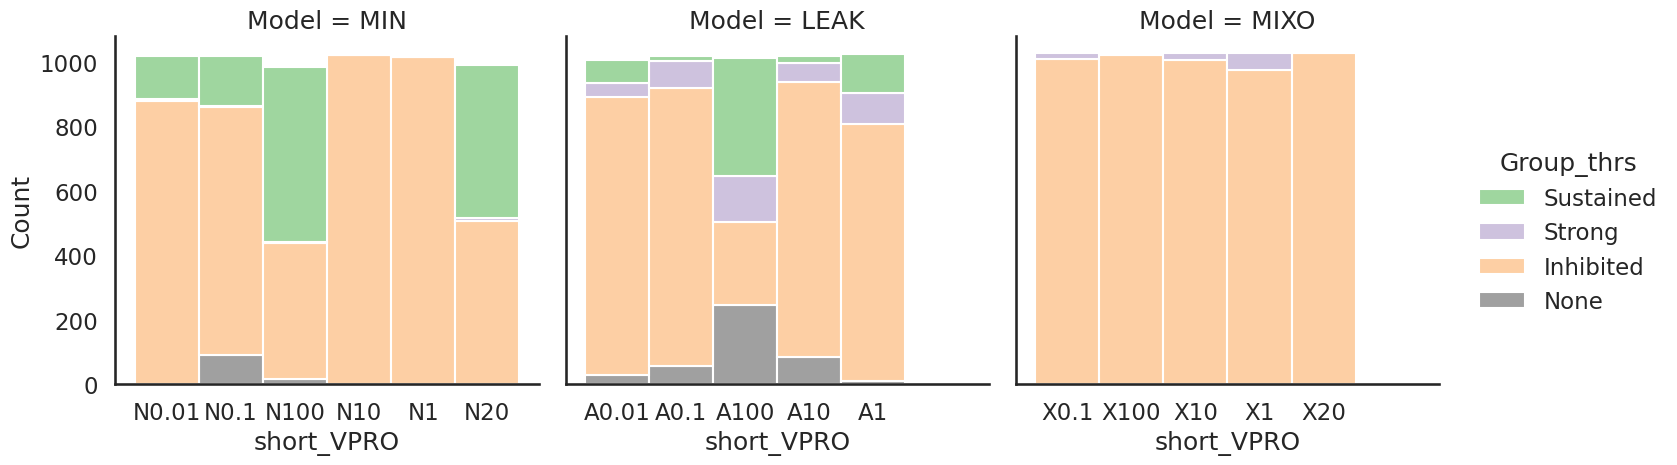

In [749]:
#udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=udf, hue='Group_thrs', x='short_VPRO',  discrete=True, multiple='stack',
    col='Model',
    col_order=morder, facet_kws=dict(sharex=False),
    hue_order=gorder + ['None'], palette=gpalette + ['grey'], #stat='frequency',
            
           )

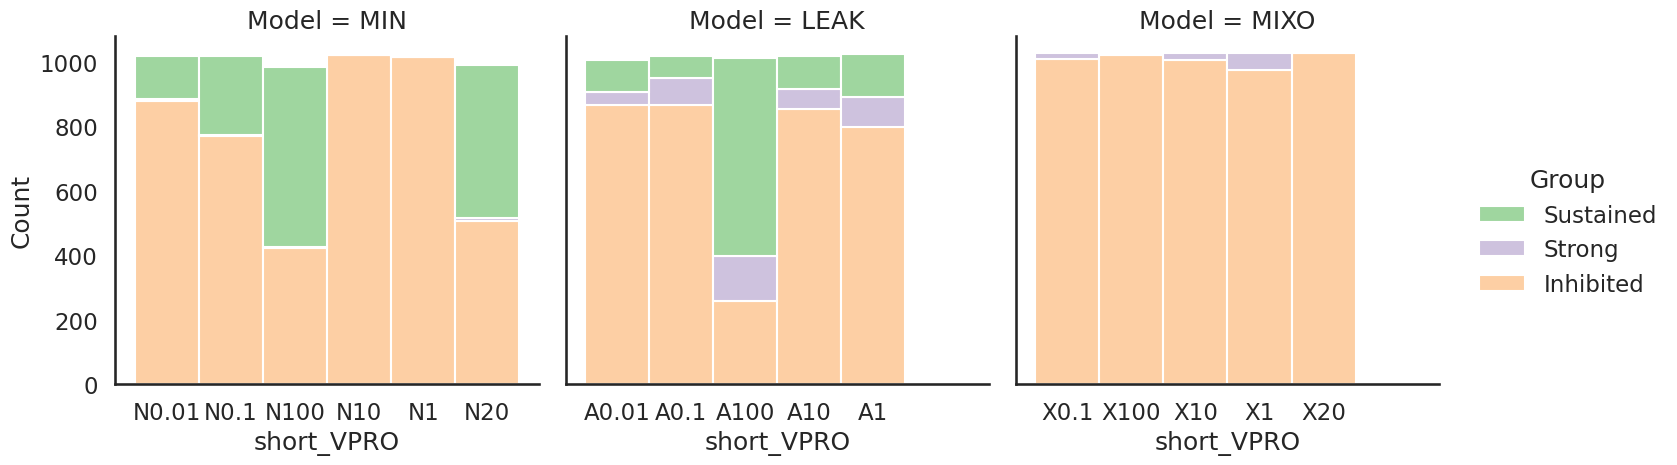

In [750]:
#udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=udf, hue='Group', x='short_VPRO',  discrete=True, multiple='stack',
    col='Model',
    col_order=morder, facet_kws=dict(sharex=False),
    hue_order=gorder , palette=gpalette 
            
           )

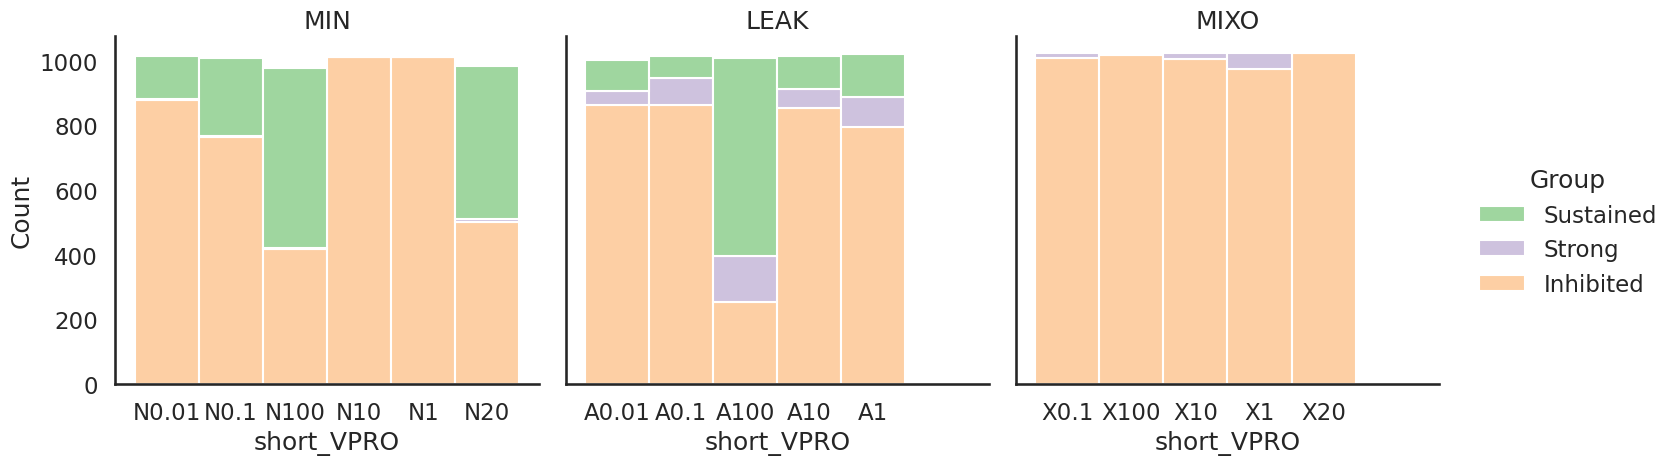

In [751]:
#udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=min_mse_df.loc[min_mse_df.Mode.isin(['Monte'])], 
    hue='Group', x='short_VPRO',  discrete=True, multiple='stack',
    col='Model',
    col_order=morder, facet_kws=dict(sharex=False),
    hue_order=gorder , palette=gpalette 
            
           ).set_titles(col_template='{col_name}')

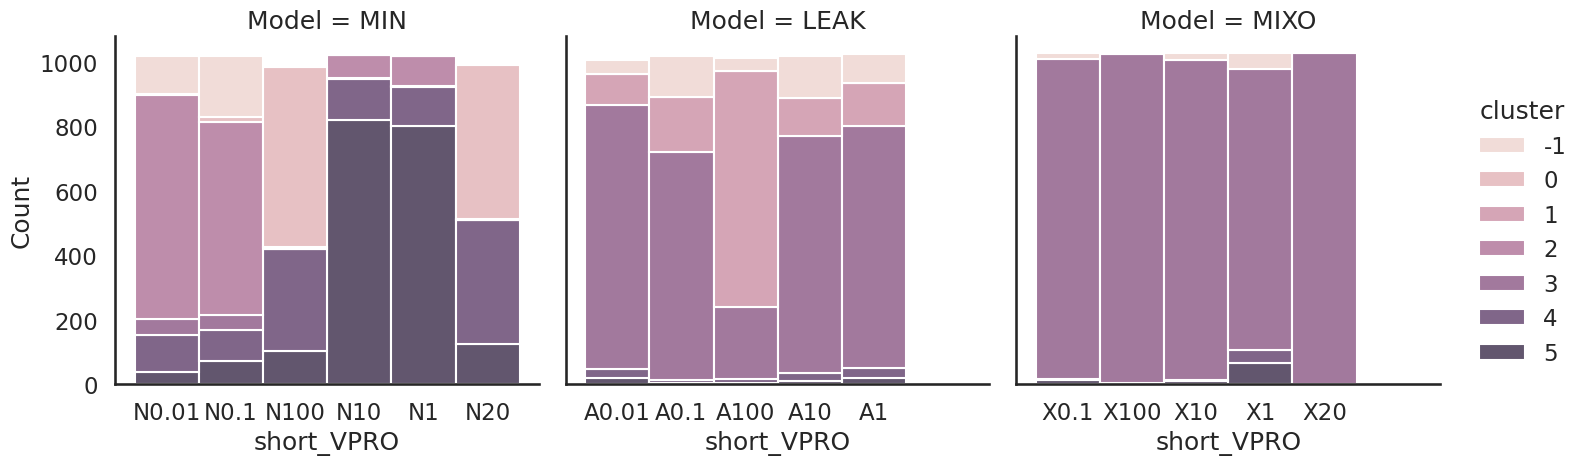

In [752]:
#udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=udf, hue='cluster', x='short_VPRO',  discrete=True, multiple='stack',
    col='Model',
    col_order=morder, facet_kws=dict(sharex=False),
    #hue_order=gorder , palette=gpalette 
            
           )

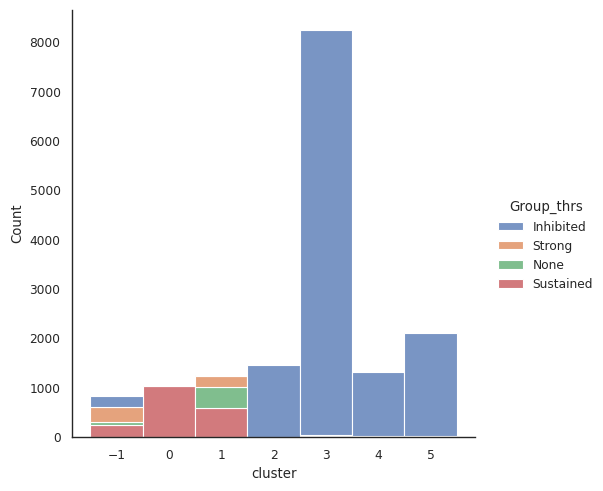

In [584]:
sns.displot(data=udf, x='cluster', hue='Group_thrs', discrete=True, multiple='stack')

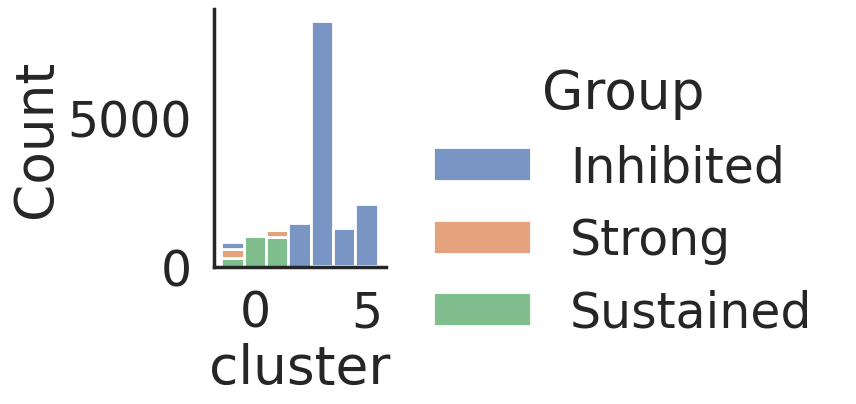

In [699]:
sns.displot(data=udf, x='cluster', hue='Group', discrete=True, multiple='stack')

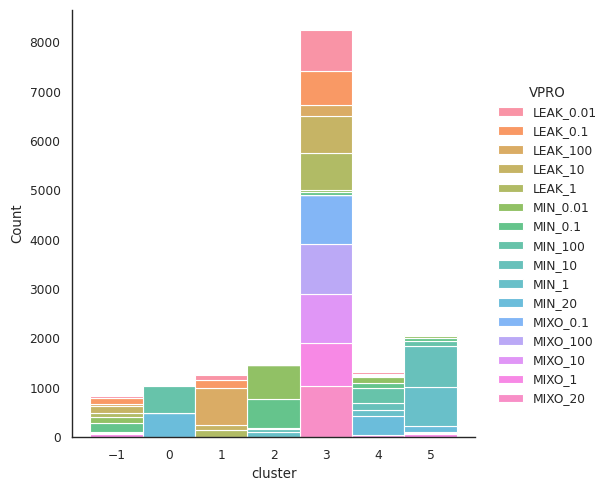

In [585]:
sns.displot(data=udf, x='cluster', hue='VPRO', discrete=True, multiple='stack')

In [517]:
udf.pivot_table(index='cluster', columns='Group_thrs', fill_value=0, aggfunc='count', values='Mode')

Group_thrs  Inhibited  None  Strong  Sustained
cluster                                       
-1                233    63     291        245
 0                  0    23      10       1023
 1                 18   423     216        596
 2               1467     0       0          0
 3               8198     5      17         23
 4               1296     6       2          6
 5               2079    10       1         12

In [518]:
[len(i) for i in clusterer.exemplars_]

In [519]:
exemplar_dict =  {
    cid : np.concatenate([np.where((i == clusterable_embedding).all(axis=1))[0] for i in c_exemplars]) 
  for cid, c_exemplars in enumerate(clusterer.exemplars_)
}
    
        #print (i)
        

In [520]:
exemplar_array = np.full_like(clusterer.labels_, fill_value=-10)
for k,v in exemplar_dict.items():
    exemplar_array[v] = k
#zero[indices] = 42
exemplar_array
udf['exemplar'] = exemplar_array
udf.loc[udf['exemplar'].isin([-10]), 'exemplar'] = np.NaN

In [521]:
udf['exemplar']

0        NaN
1        NaN
2        NaN
3        3.0
4        NaN
        ... 
16258    NaN
16259    NaN
16260    NaN
16261    3.0
16262    NaN
Name: exemplar, Length: 16263, dtype: float64

In [522]:
udf[['cluster', 'exemplar']].value_counts(dropna=False)

cluster  exemplar
 3       NaN         4751
         3.0         3492
 5       5.0         1065
         NaN         1037
 2       NaN          918
-1       NaN          832
 4       NaN          758
 1       NaN          655
 0       0.0          636
 1       1.0          598
 4       4.0          552
 2       2.0          549
 0       NaN          420
dtype: int64

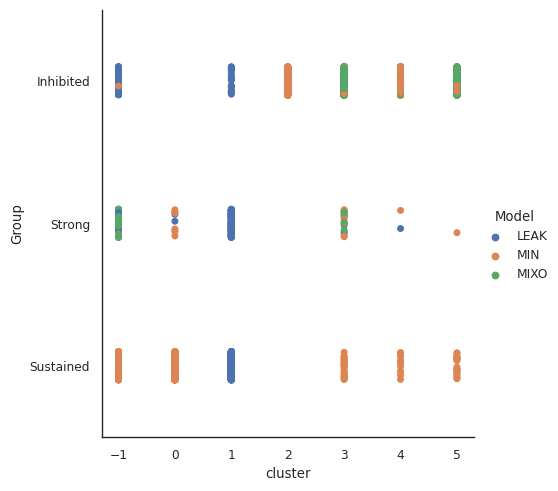

In [525]:
sns.catplot(
    data=udf,
    x='cluster',
    y='Group',
    hue='Model'
)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

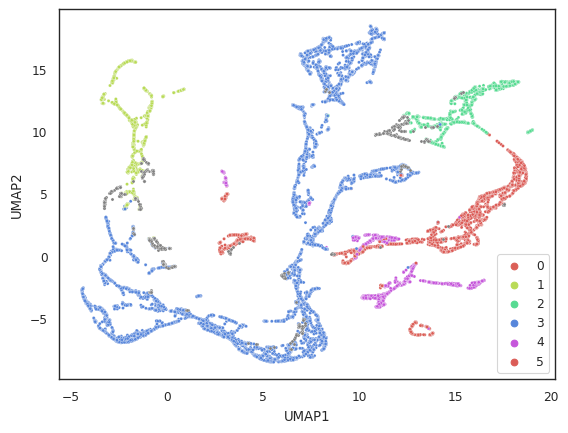

In [523]:
clustered = (labels >= 0)
sns.scatterplot(
    data=udf.loc[clustered],
    x='UMAP1', y='UMAP2',
    hue='cluster',
    s=5,
    palette='hls');
sns.scatterplot(
    data=udf.loc[~clustered],
    x='UMAP1', y='UMAP2',
            color=(0.5, 0.5, 0.5),
            s=5,
            #alpha=0.5
)


In [421]:
udf.pivot_table(index='cluster', columns='Group', fill_value=0, aggfunc='count', values='Mode')

Group    Inhibited  Strong  Sustained
cluster                              
-1             280       0          0
 0            1467      17        314
 1             868       3          2
 2             130     240       1015
 3              33     230        744
 4             432       5        306
 5            2067       5         30
 6            1855       0          0
 7            1502      15         20
 8            1178       5          0
 9            3482      18          0

In [485]:
udf.pivot_table(index='exemplar', columns='Group', fill_value=0, aggfunc='count', values='Mode')

Group     Inhibited  Strong  Sustained
exemplar                              
0.0             827       0        256
1.0             751       2          0
2.0               6     132        443
3.0              11      28        511
4.0             300       3        220
5.0             499       0          1
6.0            1205       0          0
7.0            1434       9          8
8.0             500       0          0
9.0            1057       0          0

In [486]:
udf.pivot_table(index='exemplar', columns='Group_thrs', fill_value=0, aggfunc='count', values='Mode')

Group_thrs  Inhibited  None  Strong  Sustained
exemplar                                      
0.0               474   609       0          0
1.0               612   141       0          0
2.0                 4   337     127        113
3.0                 2   524      24          0
4.0                87   432       2          2
5.0               480    20       0          0
6.0              1205     0       0          0
7.0              1421    27       3          0
8.0               500     0       0          0
9.0              1055     2       0          0

In [422]:
ccnpalette

['#7285b7', 'black', '#bbdaff', '#326232', '#ffa98f', '#99cc99', '#ffc58f']

In [423]:
ccnorder1= ['DON', 'RDON', 'DIN', 'Bp', 'Bh']
ccnpalette1 = [ccnpalette[0], ccnpalette[1], ccnpalette[2], ccnpalette[5], ccnpalette[6], ]

In [424]:
ccnpalette1

['#7285b7', 'black', '#bbdaff', '#99cc99', '#ffc58f']

/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33:

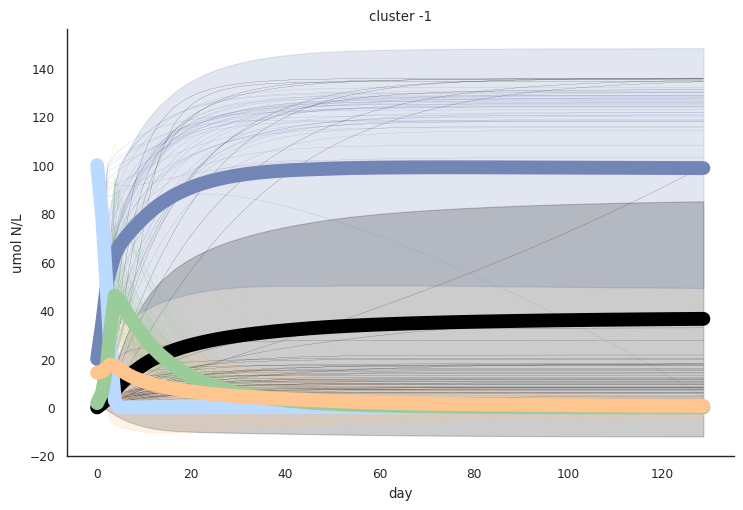

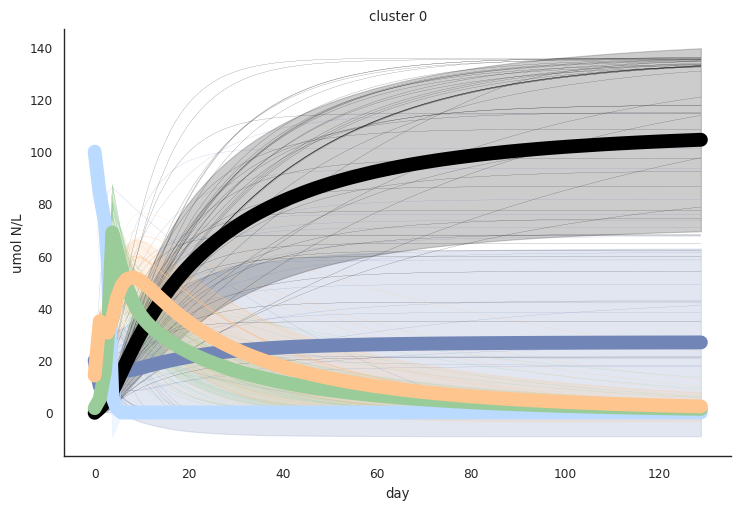

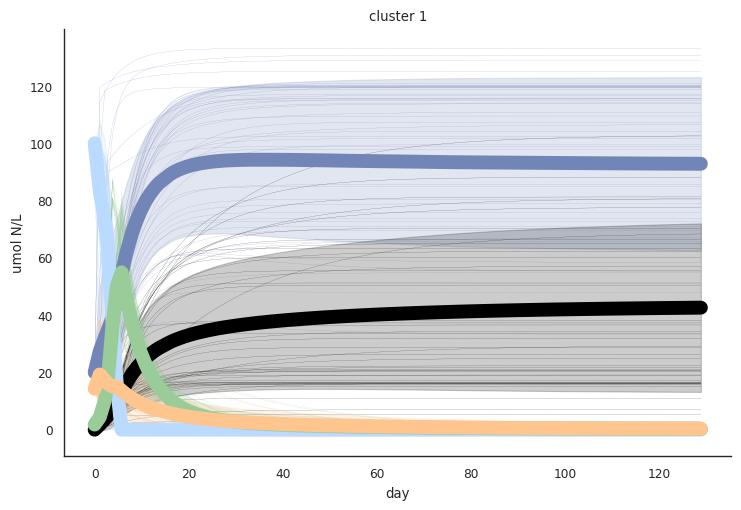

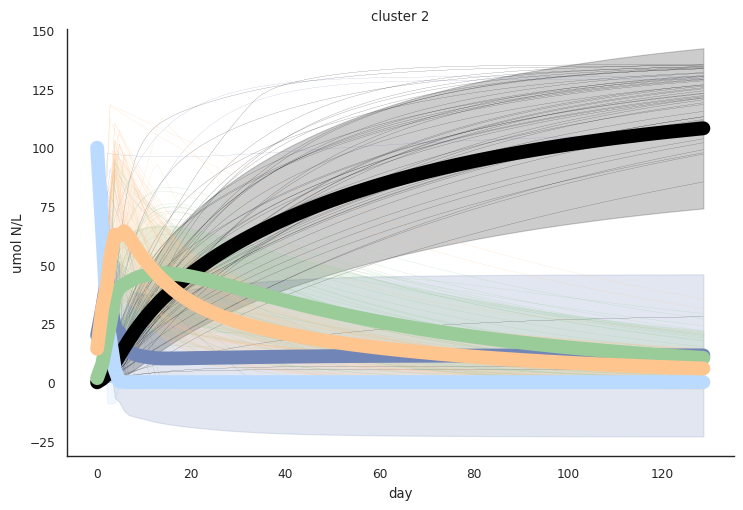

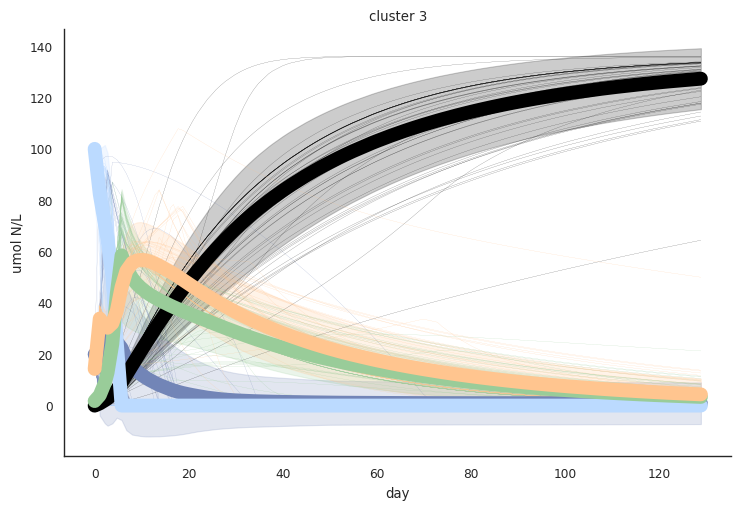

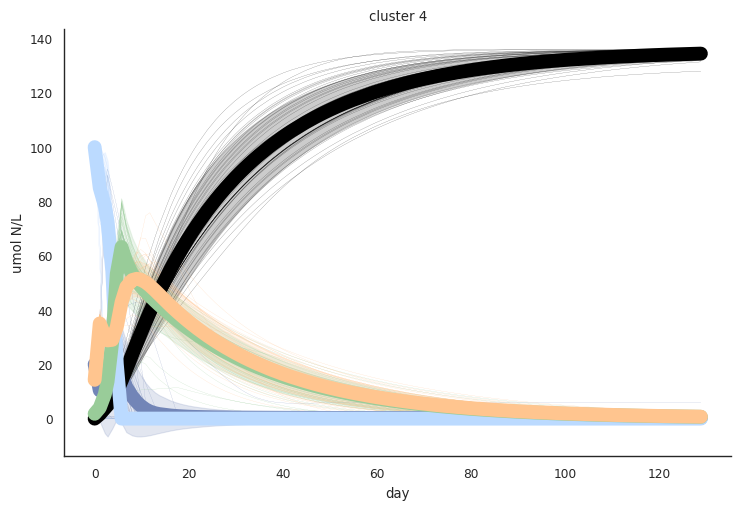

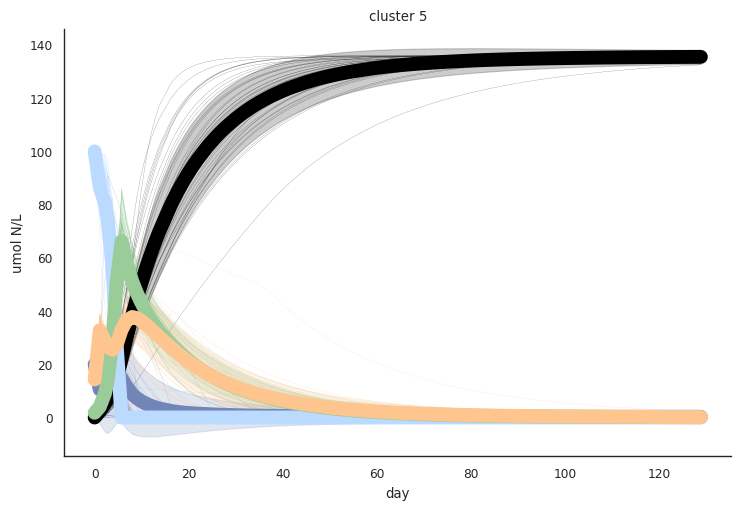

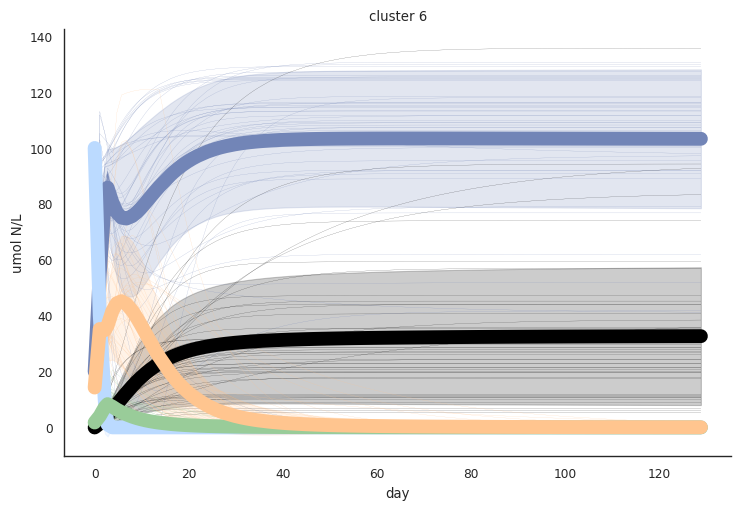

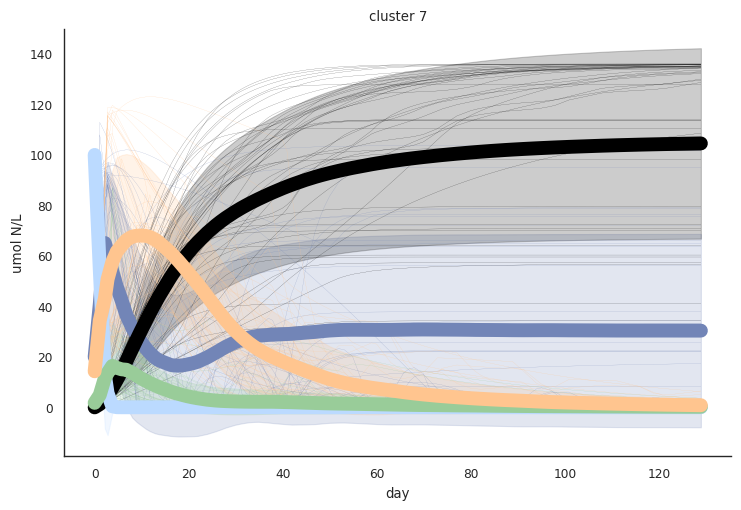

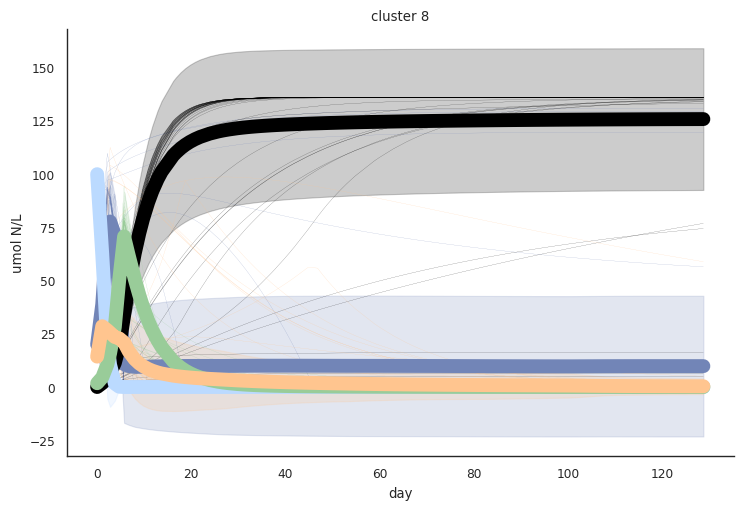

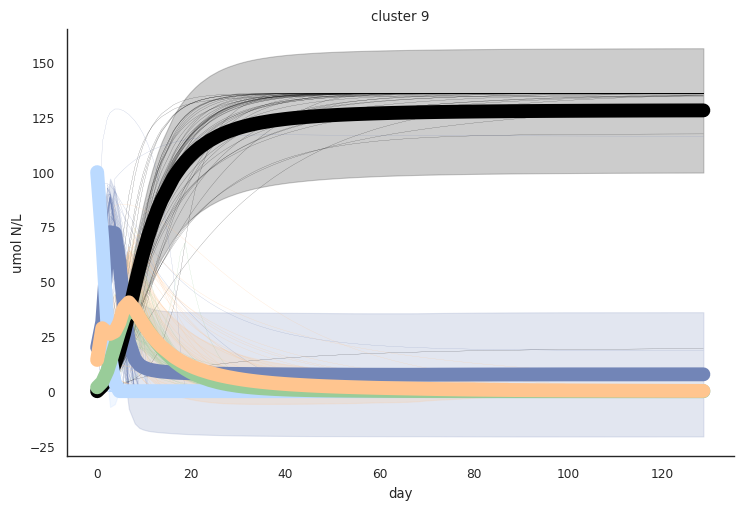

In [425]:
#mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
#mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster.unique()):
    #cluster_udf = udf.loc[udf.cluster.isin([i]) & udf.Group_thrs.isin(['Strong', 'Sustained'])]
    cluster_udf = udf.loc[udf.cluster.isin([i])] 
    if cluster_udf.shape[0] < 5:
        next
    if cluster_udf.shape[0] > 60:
        ids = list(cluster_udf['run_id'].sample(50))
    else:
        ids = cluster_udf['run_id']
    all_ids = cluster_udf['run_id']
    tdf = mdf.loc[mdf.variable.isin(ccnorder1) & mdf.run_id.isin(ids)]
    atdf = mdf.loc[mdf.variable.isin(ccnorder1) & mdf.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='day', y='value',
        hue='variable', hue_order=ccnorder1, palette=ccnpalette1,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.1,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='day', y='value',
        hue='variable', hue_order=ccnorder1, palette=ccnpalette1, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


<Axes: ylabel='$\\lambda$ value'>

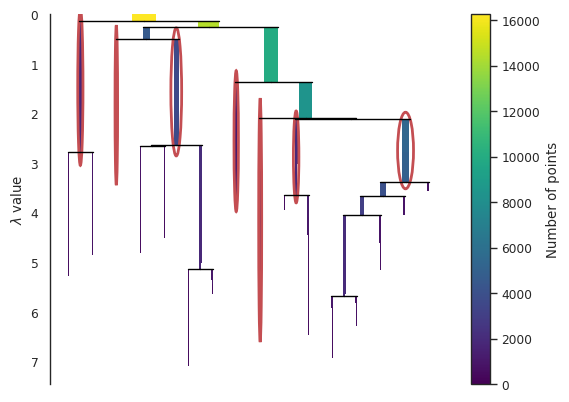

In [328]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette='Fire')

In [383]:
clusterer.exemplars_

[array([[-0.267562  ,  1.12650239,  0.18690842, ...,  7.48128605,
          4.46168613,  2.79031157],
        [-0.35659271,  1.12746358,  0.09353489, ...,  8.141819  ,
          3.8931303 ,  2.83933091],
        [-0.27440006,  1.12873626,  0.18248384, ...,  7.52127981,
          4.4317379 ,  2.80507994],
        ...,
        [-0.28949443,  1.13558805,  0.21817774, ...,  7.38267469,
          4.64472675,  2.8424294 ],
        [-0.27158001,  1.12769246,  0.20796129, ...,  7.39664459,
          4.56318283,  2.78673244],
        [-0.27403715,  1.12941432,  0.20791805, ...,  7.40348339,
          4.56681776,  2.79527855]]),
 array([[-0.22463728,  1.20142877, -0.05820673, ...,  6.01402044,
          6.1631732 ,  3.6343081 ],
        [-0.26042151,  0.99286205, -0.05128103, ...,  5.97263908,
          6.08361006,  3.61318946],
        [-0.28098169,  0.94385642, -0.04926388, ...,  5.92047691,
          6.15692043,  3.6220367 ],
        ...,
        [ 0.13374588,  0.32696012, -0.51644397, ...,  

5.0


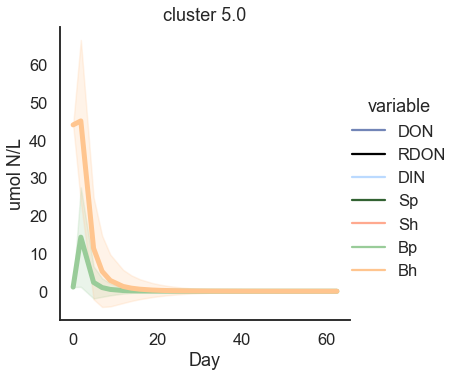

7.0


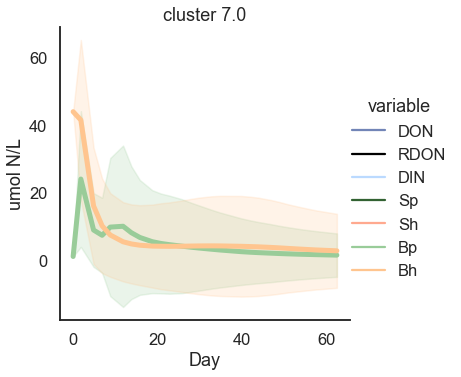

10.0


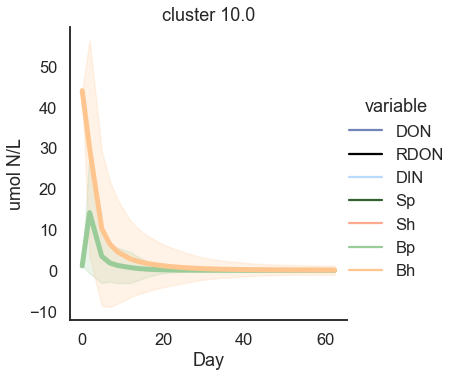

3.0


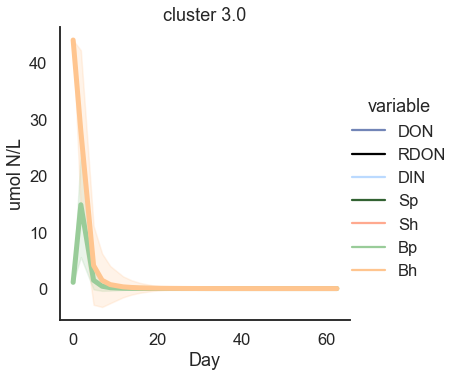

zero


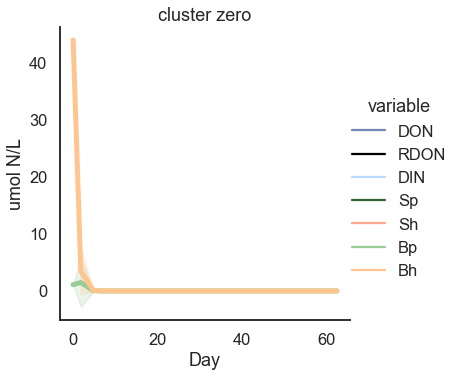

2.0


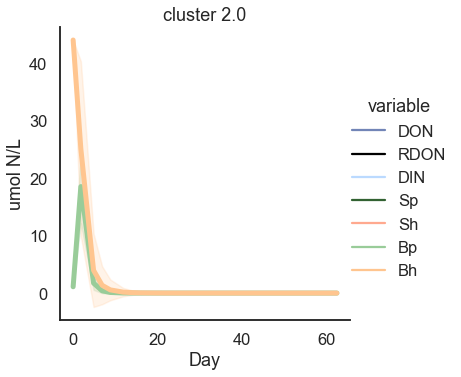

6.0


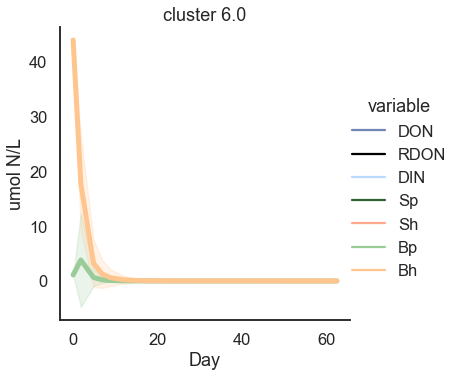

negative


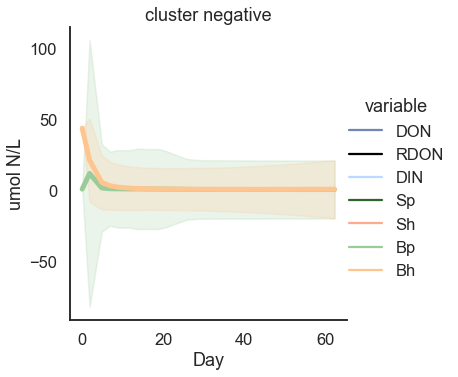

8.0


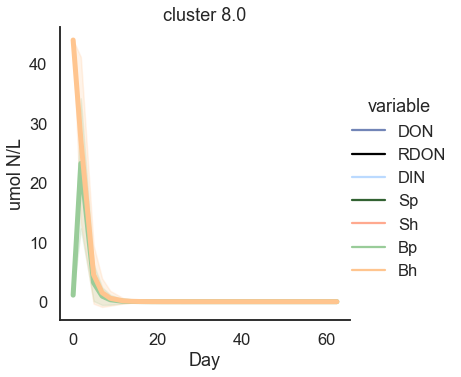

4.0


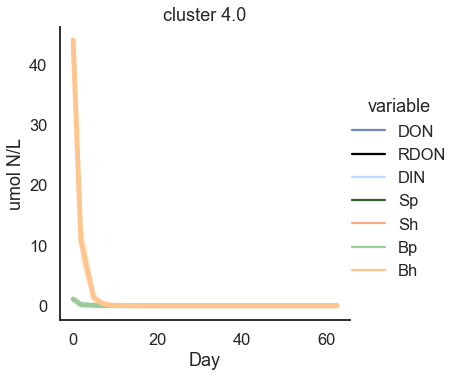

0.0


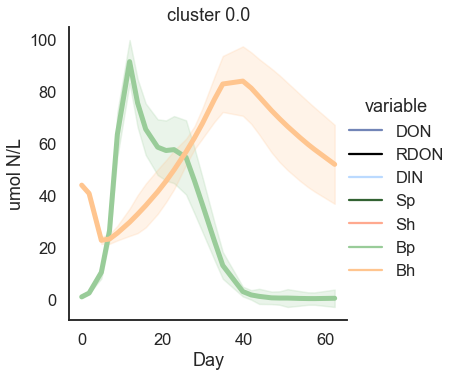

1.0


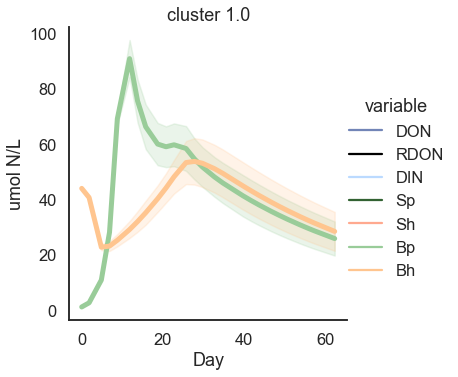

9.0


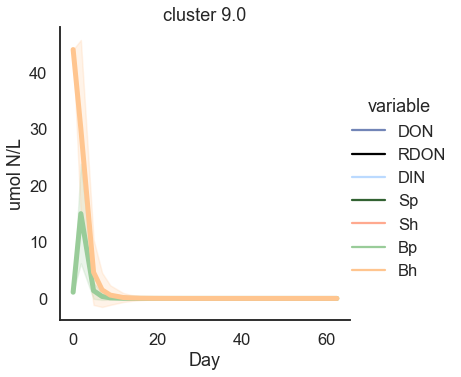

In [151]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in (sum_df2.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(sum_df2.loc[sum_df2.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(['Bp', 'Bh']) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


0


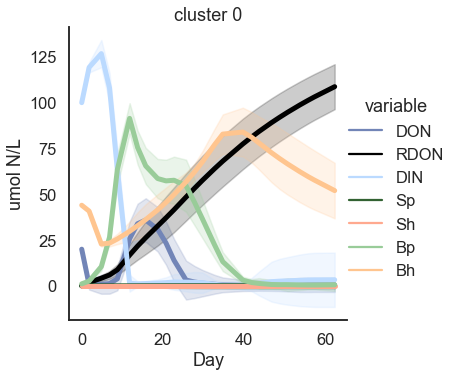

1


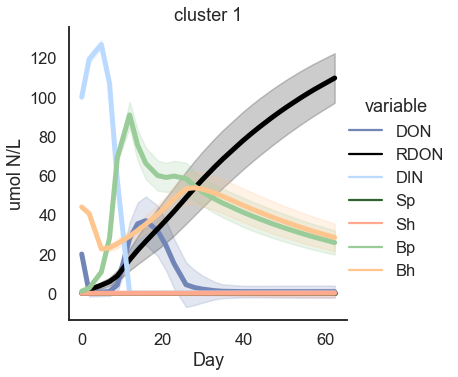

2


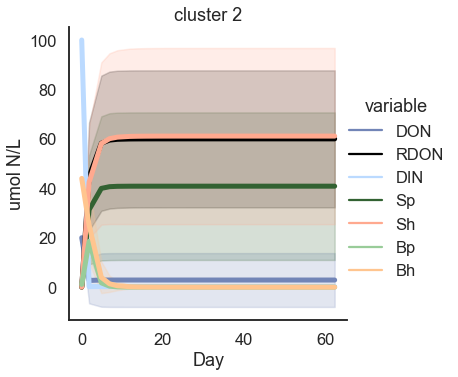

3


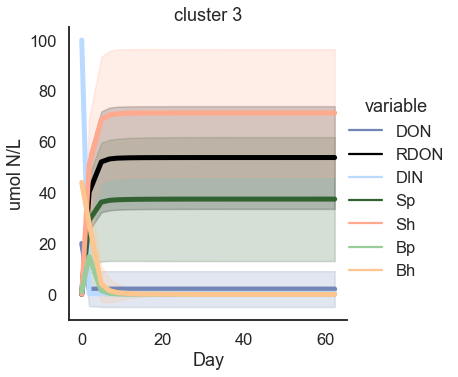

4


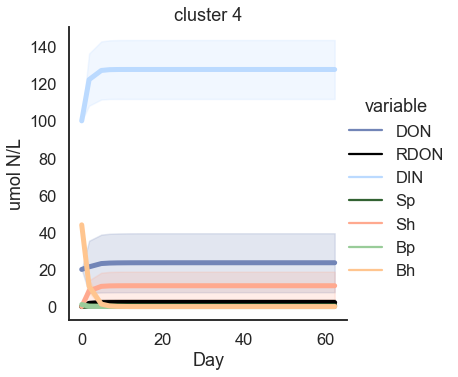

5


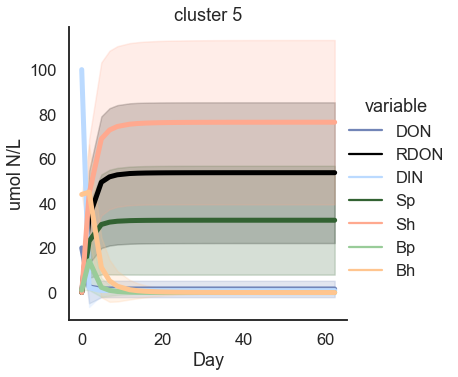

6


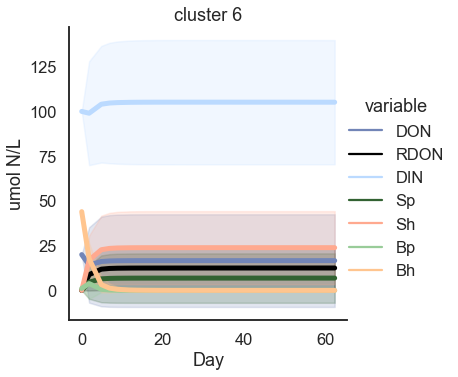

7


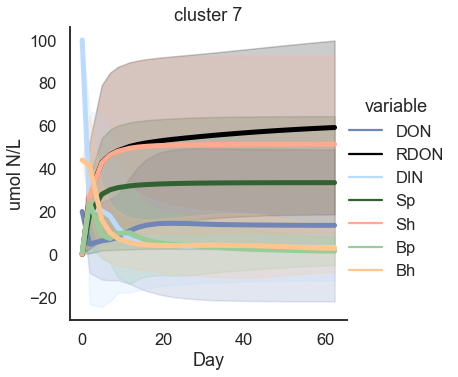

8


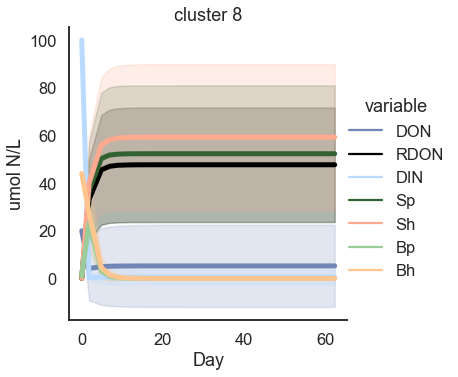

9


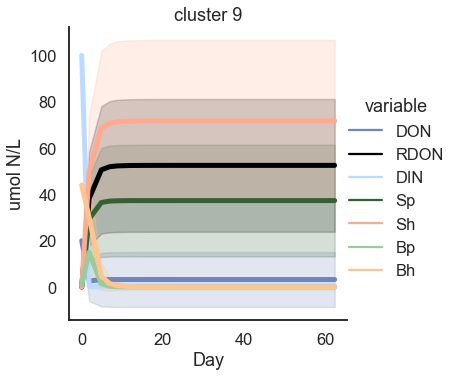

10


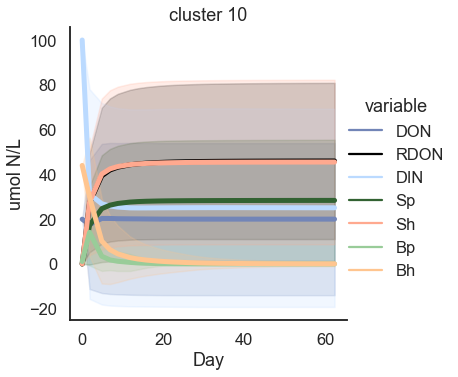

In [152]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


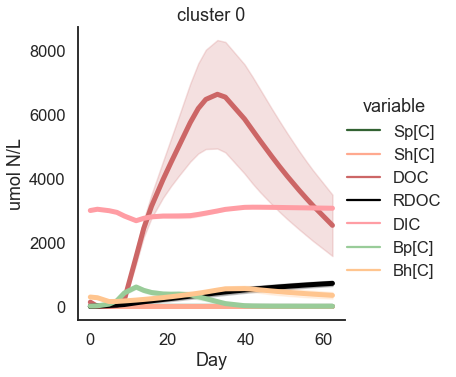

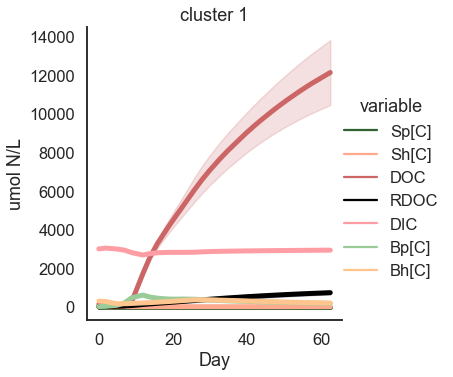

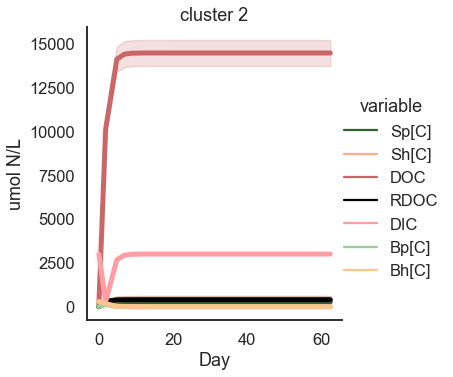

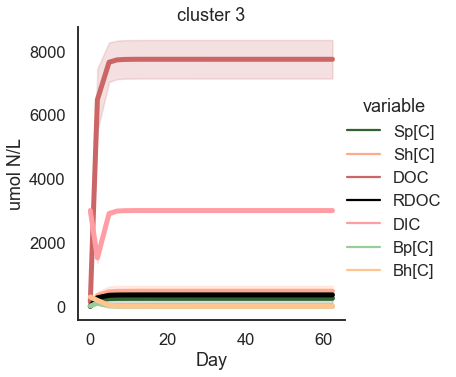

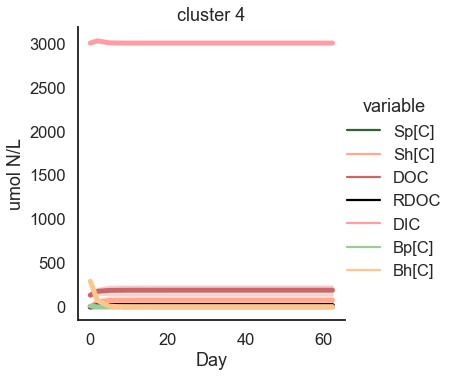

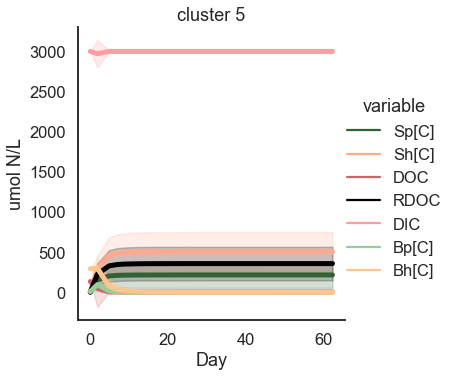

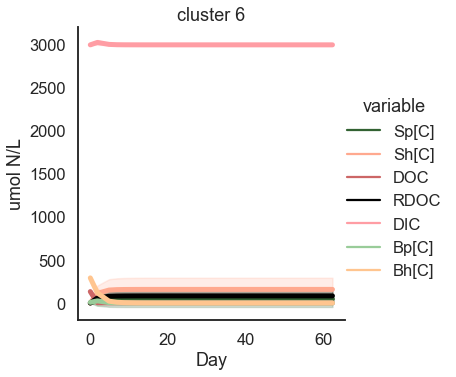

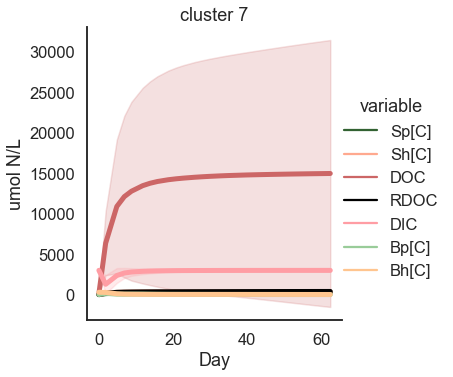

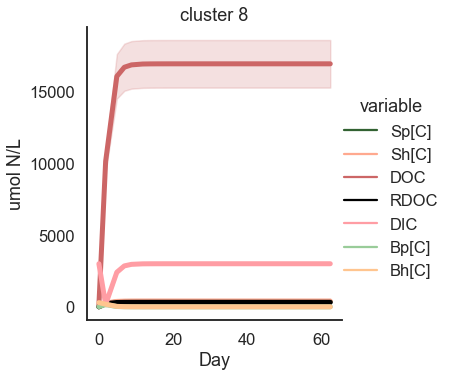

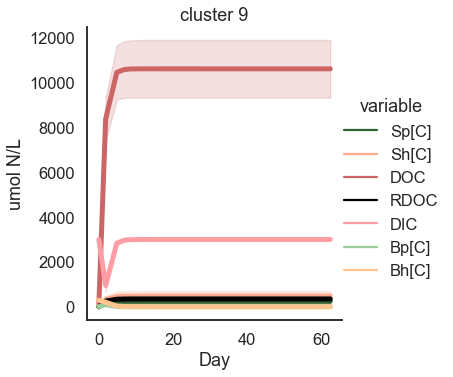

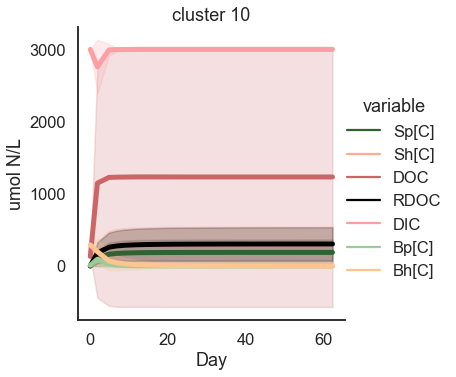

In [153]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    #ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


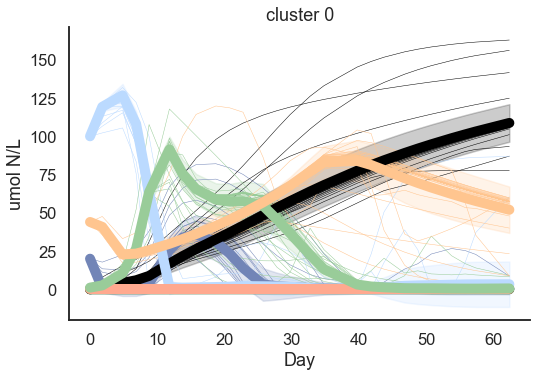

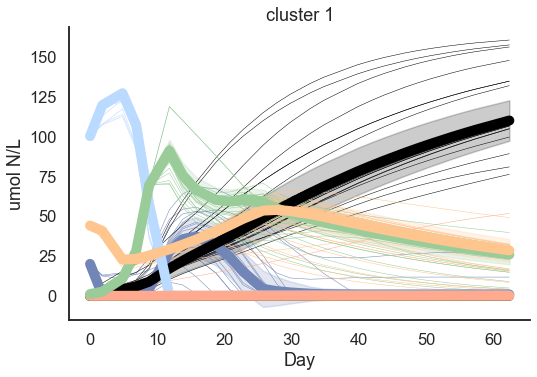

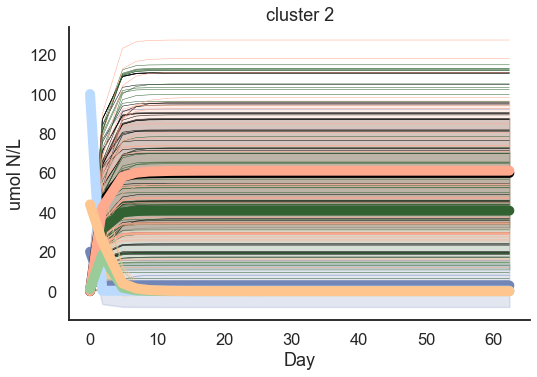

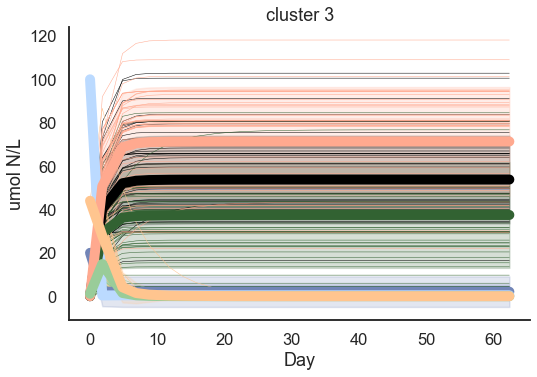

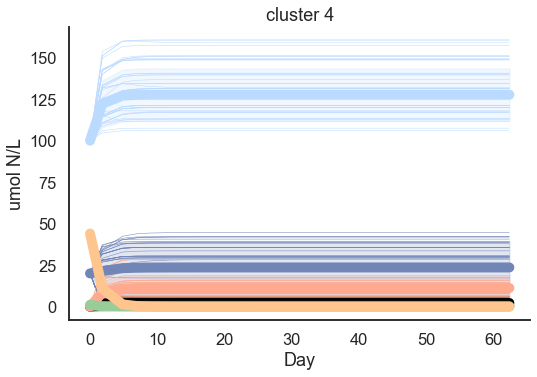

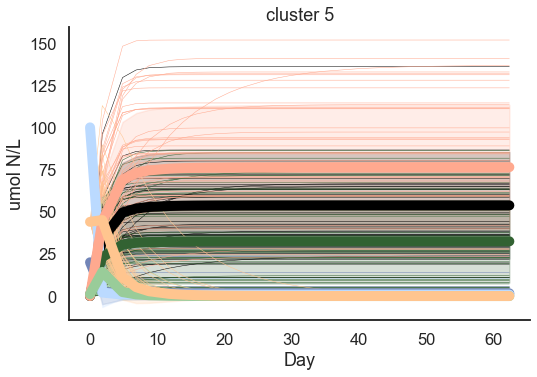

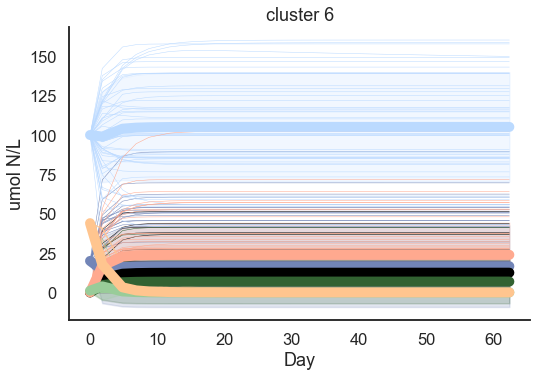

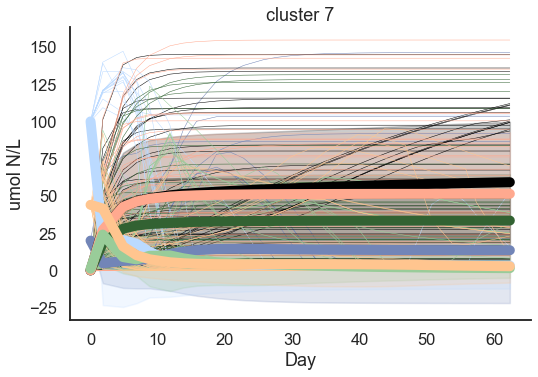

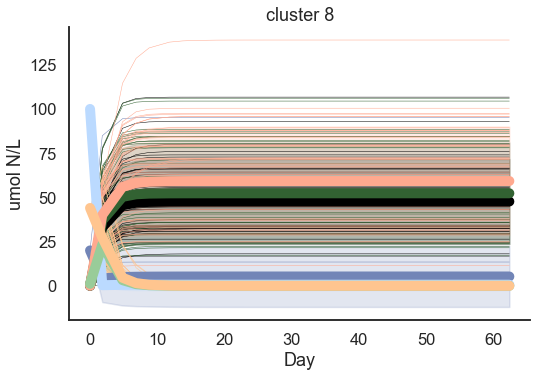

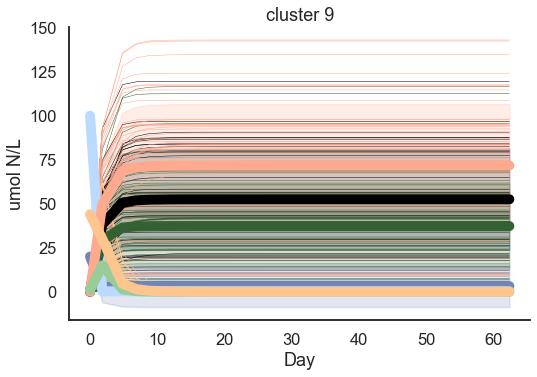

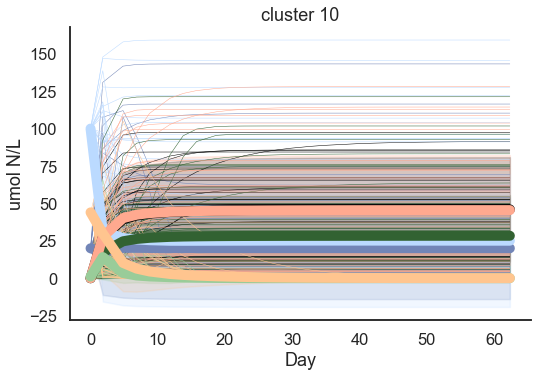

In [154]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


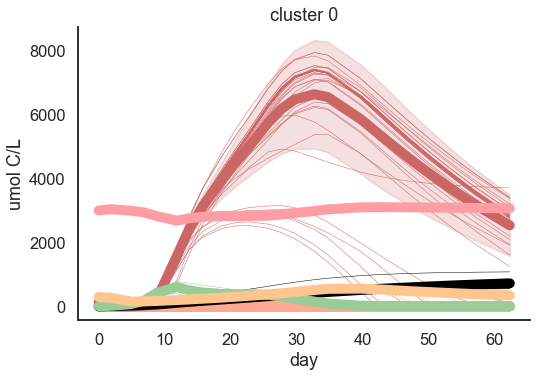

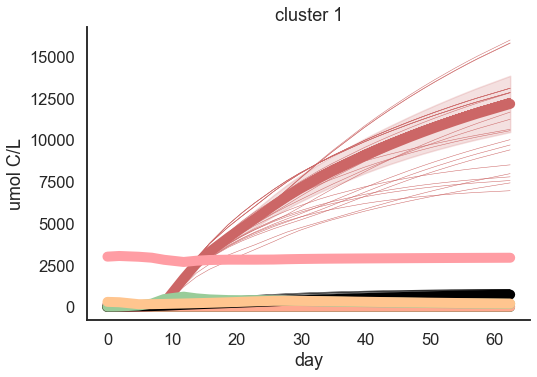

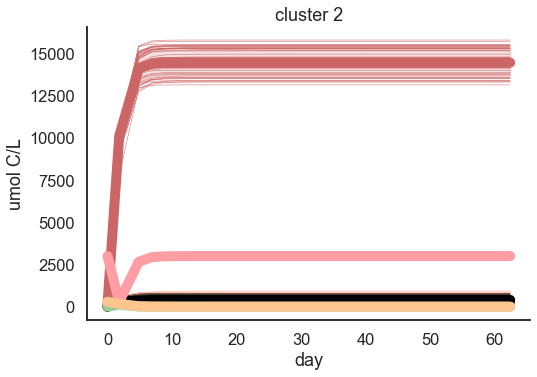

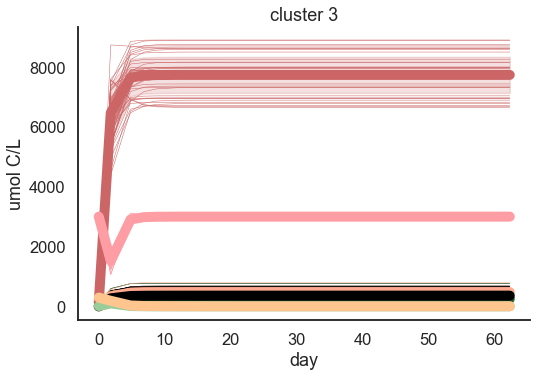

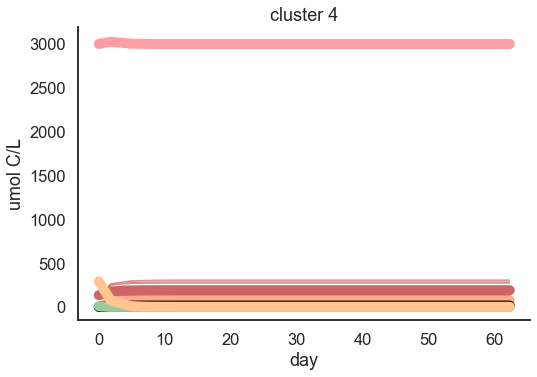

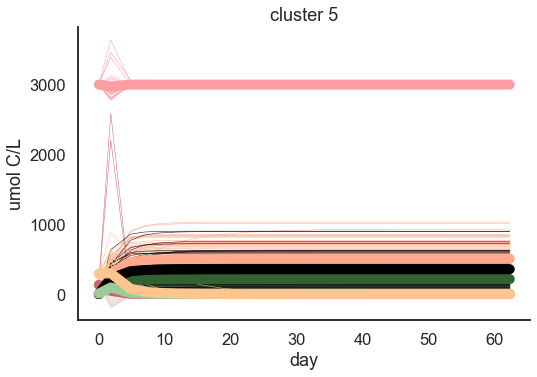

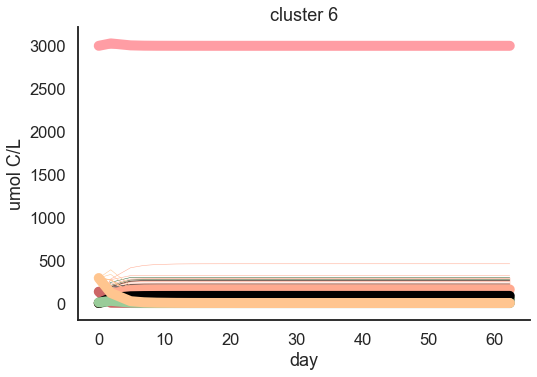

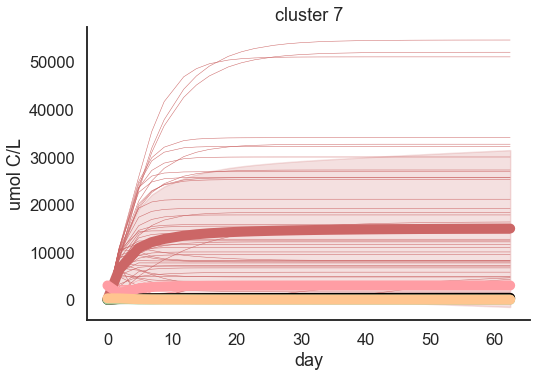

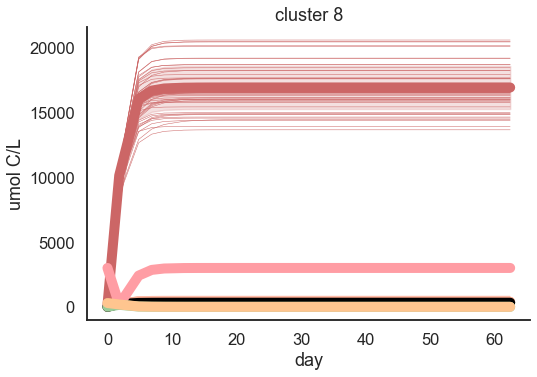

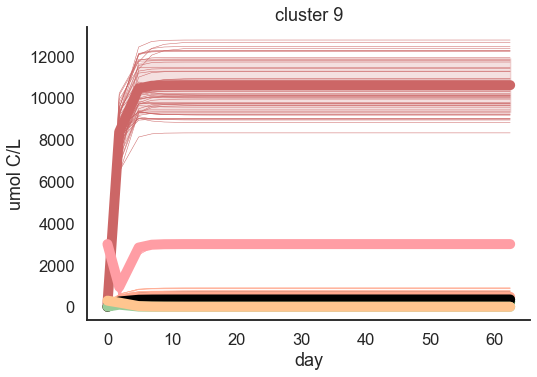

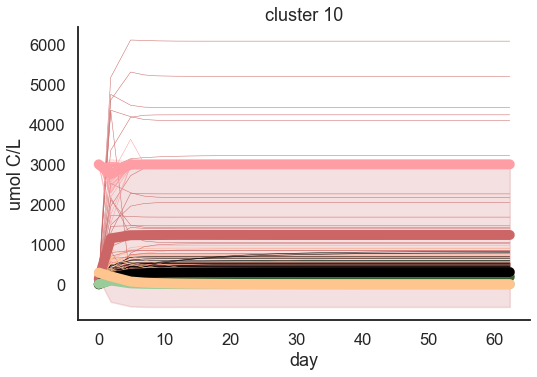

In [155]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [156]:
udf.head()

UMAP1      UMAP2                     run_id  Unnamed: 0           M_h  \
0  -4.203127  17.046898  de3_h-1073436347008145156           0  6.542767e-07   
1  -8.958201  12.223330  de3_h-1659825646723300236           0  9.715511e-06   
2  20.315327   9.566874  de3_h-1765083009615901515           0  1.008276e-05   
3  -4.633354  15.106026  de3_h-2171644033102072858           0  1.143038e-05   
4   3.143292   4.256141  de3_h-3012145983443439829           0  1.106115e-05   

        M_p  gamma^D_p  gamma^D_h    R_p    R_h  ...        p_err  \
0  0.000011   0.298158   0.229257  6.625  6.625  ...  1603.049991   
1  0.000002   0.620677   0.419616  6.625  6.625  ...  1606.113574   
2  0.000004   0.631468   0.491229  6.625  6.625  ...  1604.830136   
3  0.000010   0.842866   0.587069  6.625  6.625  ...  1604.574999   
4  0.000002   0.955503   0.805939  6.625  6.625  ...  1643.328802   

         error  logerror  message  type  max_nonzero_day  negative   zero  \
0  5589.574743  8.628658      NaN   de3        11.803472     False  False   
1  5612.515391  8.632754      NaN   de3         8.779167     False  False   
2  5634.977794  8.636748      NaN   de3         6.853472     False  False   
3  5594.669588  8.629570      NaN   de3        11.803472     False  False   
4  5651.208692  8.639625      NaN   de3        11.803472     False  False   

   cluster  cluster2  
0       -1         8  
1       -1         7  
2        6         6  
3       -1         7  
4       -1        10  

[5 rows x 59 columns]

In [157]:
Xh.columns

MultiIndex([('value', 'Bp',  5.0),
            ('value', 'Bp', 12.0),
            ('value', 'Bp', 16.0),
            ('value', 'Bp', 19.0),
            ('value', 'Bp', 42.0),
            ('value', 'Bp', 62.0),
            ('value', 'Bh',  5.0),
            ('value', 'Bh', 12.0),
            ('value', 'Bh', 16.0),
            ('value', 'Bh', 19.0),
            ('value', 'Bh', 42.0),
            ('value', 'Bh', 62.0)],
           names=[None, 'variable', 'day0'])

In [ ]:
udf['Bp@42'] = udf['run_id'].map(Xh[('value', 'Bp', 42.0)])
udf['Bh@42'] = udf['run_id'].map(Xh[('value', 'Bh', 42.0)])


In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=3, kind='ecdf')

In [ ]:

mdf2 = pd.merge(mdf2, udf[['run_id', 'cluster', 'cluster2']], on='run_id', )

In [ ]:

sns.displot(data=mdf2.loc[mdf2.Day.round(0).isin(sample_days) & mdf2.variable.isin(['Bp', 'Bh'])], 
            x='value', col='Day', palette='Set2', row='variable',
            aspect=1,
            kind='ecdf', hue='cluster2'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=1,
            kind='ecdf', col='cluster'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='error', hue='cluster2', palette='fire', 
            aspect=3, kind='ecdf')

In [ ]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

In [ ]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

In [ ]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

In [158]:
sum_df2.to_csv('cluster_assignment.csv.gz')